# !! Dieses Notebook dient nur zur Analyse und Untersuchung der Ergebnisse !!


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import seaborn as sns
from  matplotlib.colors import LinearSegmentedColormap

# Define new colormap (red to green)
c = ["darkred","red","lightcoral","white", "palegreen","green","darkgreen"]
v = [0,.15,.4,.5,0.6,.9,1.]
l = list(zip(v,c))

# Explore MNIST Classes

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

X_train_explore = X_train[:8000]
y_train_explore = y_train[:8000]

In [3]:
median_pxl = {x: [] for x in range(10)}
for i in range(10):
    median_pxl_cls = {x: [] for x in range(785)}
    for img in X_train_explore[y_train_explore==i]:
        for num, value in enumerate(img.reshape(784,1)):
            #print(num, value[0])
            median_pxl_cls[num].append(value[0])
    for j in range(784):
        median_pxl[i].append(np.median(median_pxl_cls[j]))

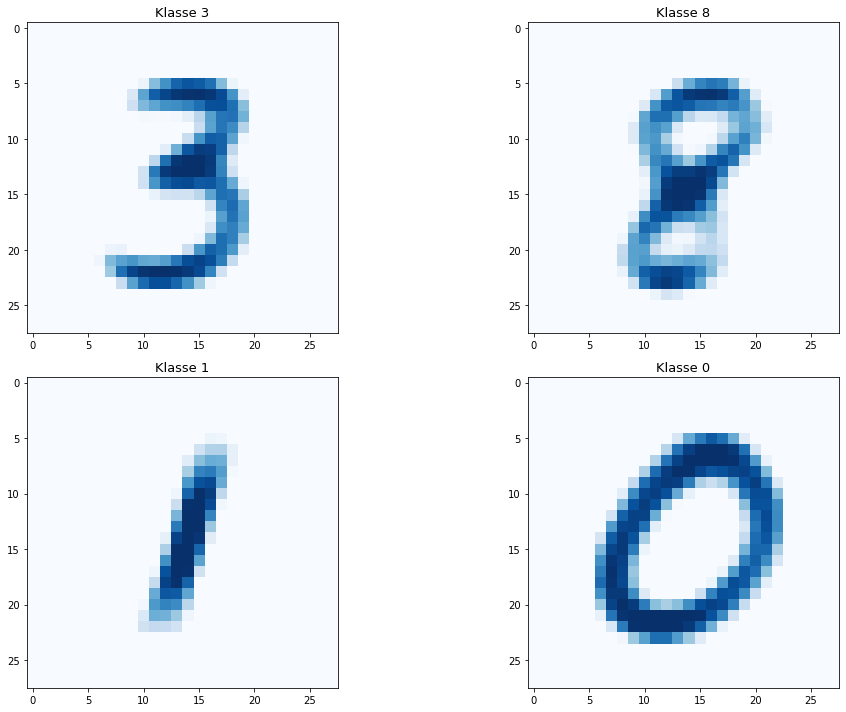

In [4]:
plt.figure(figsize=(16,10))
i = 0
for j in [3,8,1,0]:
    plt.subplot(2,2,i+1)
    plt.title(f"Klasse {j}", fontsize=13)
    plt.imshow(np.array(median_pxl[j]).reshape(28,28,1), cmap="Blues")
    i += 1
plt.tight_layout()
#plt.savefig("generated/plots/mean_pixel_dist_38_10.svg")
plt.show()

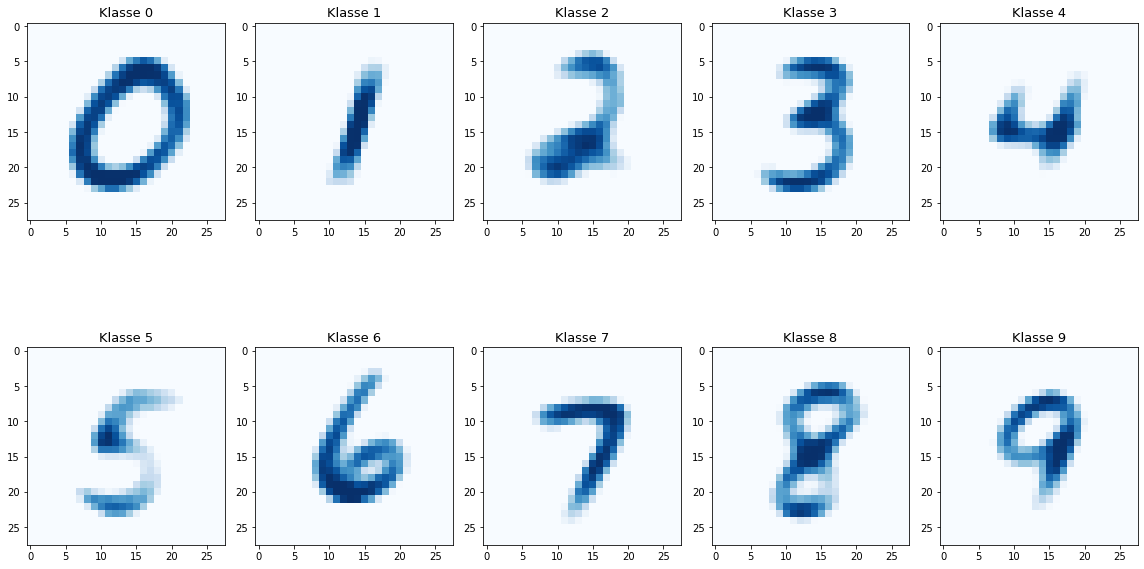

In [5]:
plt.figure(figsize=(16,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(f"Klasse {i}", fontsize=13)
    plt.imshow(np.array(median_pxl[i]).reshape(28,28,1), cmap="Blues")
plt.tight_layout()
#plt.savefig("generated/plots/mean_pixel_dist.svg")
plt.show()

In [6]:
mean_pixels_dict = {}

for i in range(10):
    mean_pxl = np.zeros((784,1))
    for img in X_train_explore[y_train_explore==i]:
        for pixel in enumerate(img.reshape(784,1)):
            #print(pixel[1][0])
            mean_pxl[pixel[0]] += pixel[1][0]
    mean_pxl /= len(X_train_explore[y_train_explore==i])
    mean_pixels_dict[i] = mean_pxl

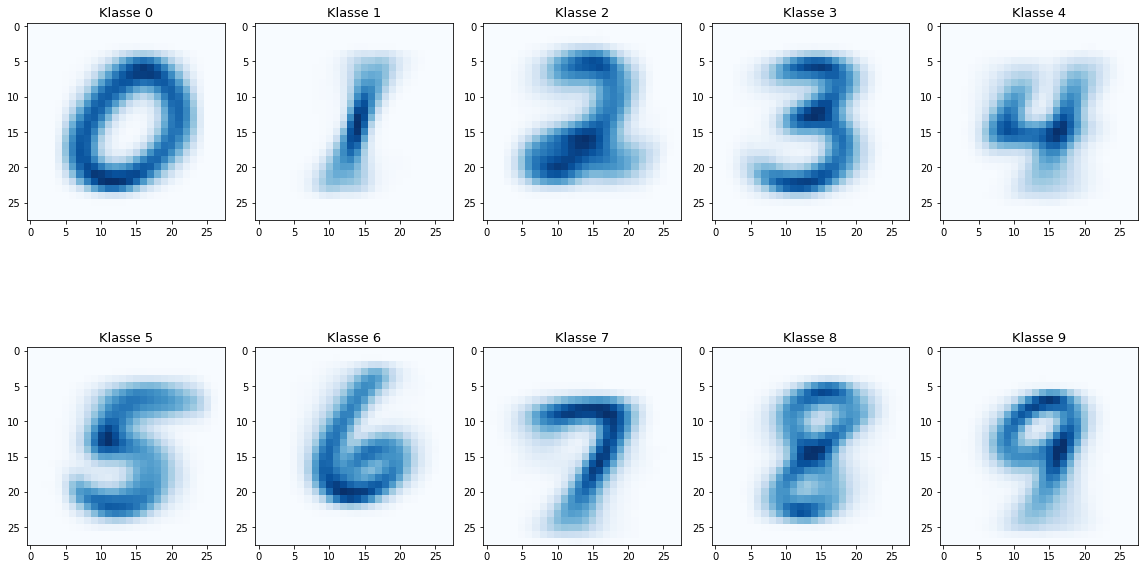

In [7]:
plt.figure(figsize=(16,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title(f"Klasse {i}", fontsize=13)
    plt.imshow(mean_pixels_dict[i].reshape(28,28,1), cmap="Blues")
plt.tight_layout()
#plt.savefig("generated/plots/mean_pixel_dist.svg")
plt.show()

In [8]:
# Euclidean Distance
from scipy.spatial import distance

euclidean_distances = np.zeros((10,10))

for i in range(10):
    for j in range(10):
        euclidean_distances[i,j] = distance.euclidean(mean_pixels_dict[i], mean_pixels_dict[j])

In [9]:
# Euclidean Distance Median
from scipy.spatial import distance

euclidean_distances_median = np.zeros((10,10))

for i in range(10):
    for j in range(10):
        euclidean_distances_median[i,j] = distance.euclidean(median_pxl[i], median_pxl[j])

In [10]:
# Manhattan Distance
from scipy.spatial.distance import cityblock

manhattan_distances = np.zeros((10,10))

for i in range(10):
  for j in range(10):
      manhattan_distances[i,j] =cityblock(mean_pixels_dict[i], mean_pixels_dict[j])

In [11]:
# Cosine Distance

cosine_distances = np.zeros((10,10))

for i in range(10):
    for j in range(10):
        cosine_distances[i,j] = distance.cosine(mean_pixels_dict[i], mean_pixels_dict[j])

In [12]:
for i, l in enumerate(euclidean_distances):
    mi = min(l[l>0])
    ma = max(l)
    print(f"{i} & {np.where(l == mi)[0][0]} & {np.where(l == ma)[0][0]} ")

0 & 5 & 1 
1 & 5 & 0 
2 & 8 & 0 
3 & 5 & 0 
4 & 9 & 0 
5 & 3 & 1 
6 & 2 & 0 
7 & 9 & 0 
8 & 5 & 0 
9 & 4 & 0 


In [13]:
for i, l in enumerate(cosine_distances):
  print(l[l>0].min())

0.16080113855933564
0.23034525740198686
0.1383441319773271
0.10308276008074857
0.08450284217917214
0.09363665877671123
0.1654868949986419
0.10318460527822526
0.09363665877671123
0.08450284217917214


In [14]:
# Cosine Distance

for i, l in enumerate(cosine_distances):
    mi = l[l>0].min()
    ma = l.max()
    print(f"MIN: {i}", mi, np.where(l == mi)[0][0])
    print(f"MAX: {i}", ma, np.where(l == ma)[0][0])
    print()

MIN: 0 0.16080113855933564 5
MAX: 0 0.5494304850620727 1

MIN: 1 0.23034525740198686 8
MAX: 1 0.5494304850620727 0

MIN: 2 0.1383441319773271 8
MAX: 2 0.3204453619219224 7

MIN: 3 0.10308276008074857 5
MAX: 3 0.3118199791708337 4

MIN: 4 0.08450284217917214 9
MAX: 4 0.46494555622759237 1

MIN: 5 0.09363665877671123 8
MAX: 5 0.33514217269424273 1

MIN: 6 0.1654868949986419 2
MAX: 6 0.3955434355652586 1

MIN: 7 0.10318460527822526 9
MAX: 7 0.41427272372141055 1

MIN: 8 0.09363665877671123 5
MAX: 8 0.25289987940251824 0

MIN: 9 0.08450284217917214 4
MAX: 9 0.3784452828991176 1



In [15]:
min_max_distances = {}
for i, l in enumerate(euclidean_distances):
    mi = l[l>0].min()
    ma = l.max()
    min_max_distances[i] = [np.where(l == mi)[0][0],np.where(l == ma)[0][0]]
    print(f"{i} & {np.where(l == mi)[0][0]} & {np.where(l == ma)[0][0]} ")

0 & 5 & 1 
1 & 5 & 0 
2 & 8 & 0 
3 & 5 & 0 
4 & 9 & 0 
5 & 3 & 1 
6 & 2 & 0 
7 & 9 & 0 
8 & 5 & 0 
9 & 4 & 0 


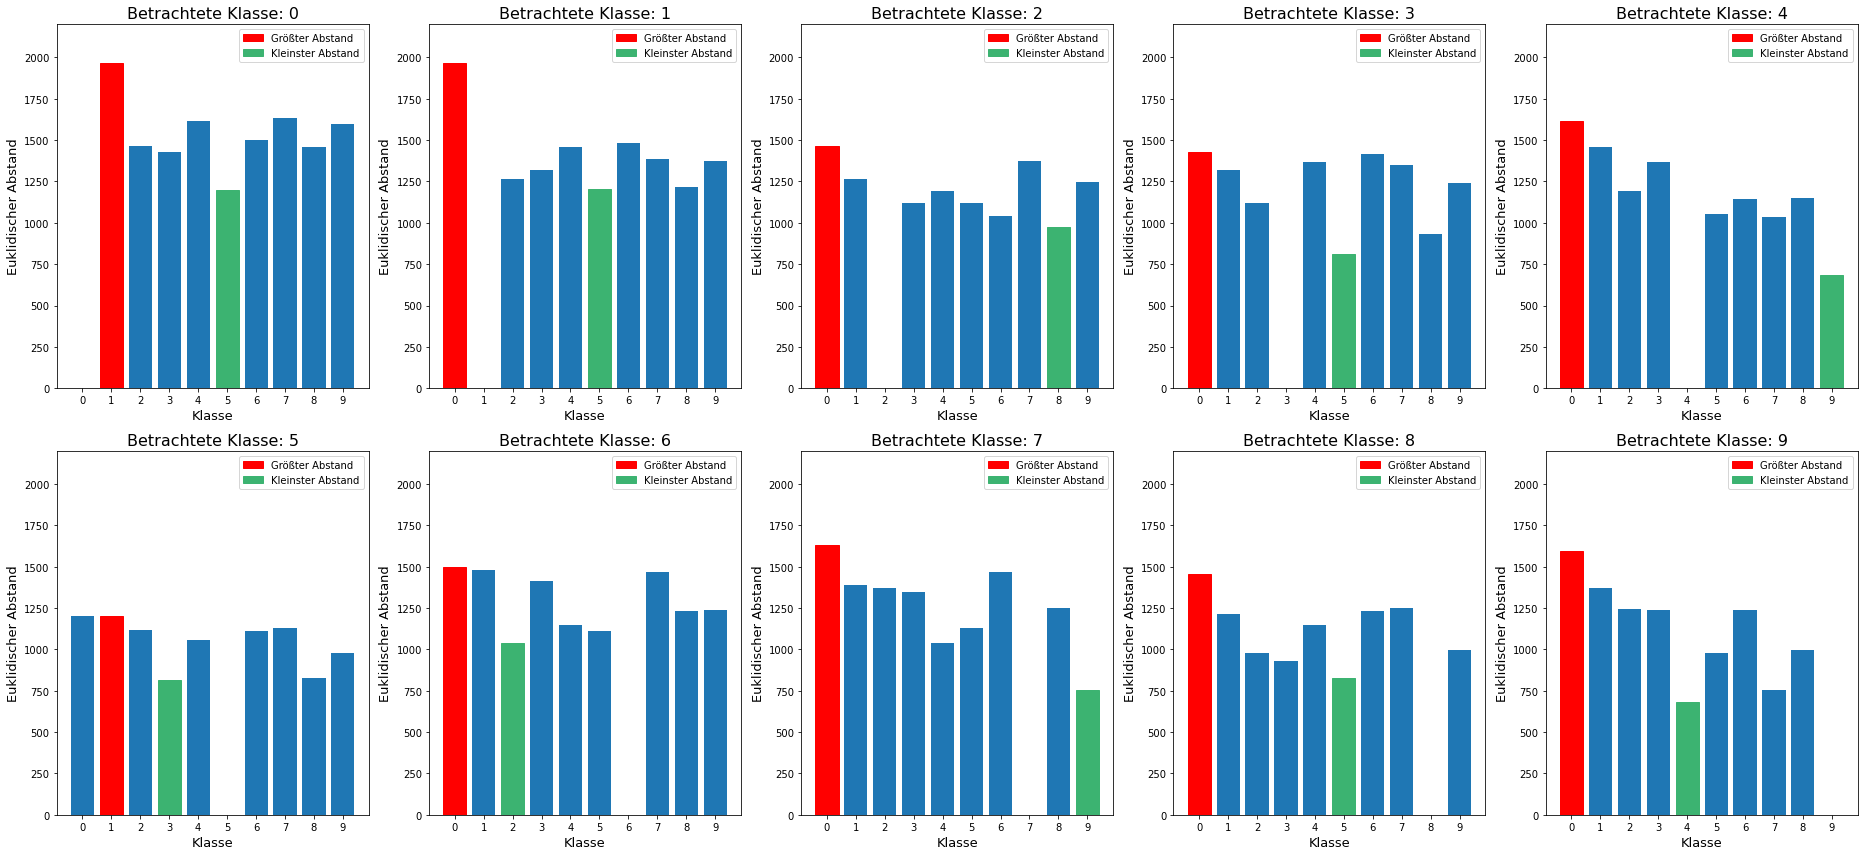

In [16]:

plt.figure(figsize=(26,12))
for i in range(10):
  plt.subplot(2,5,i+1)
  max = euclidean_distances[i].max()
  min = euclidean_distances[i][euclidean_distances[i] > 0].min()
  barlist = plt.bar(np.arange(0,10,1), euclidean_distances[i])
  barlist[np.where(euclidean_distances[i] == max)[0][0]].set_color("red")
  barlist[np.where(euclidean_distances[i] == max)[0][0]].set_label("Größter Abstand")
  barlist[np.where(euclidean_distances[i] == min)[0][0]].set_color("mediumseagreen")
  barlist[np.where(euclidean_distances[i] == min)[0][0]].set_label("Kleinster Abstand")
  plt.title(f"Betrachtete Klasse: {i}", fontsize=16)
  plt.xticks(np.arange(0,10,1))
  plt.xlabel("Klasse",fontsize=13)
  plt.ylabel("Euklidischer Abstand", fontsize=13)
  plt.ylim([0,2200])
  plt.legend()
  #plt.grid(True, axis="y")
plt.tight_layout()
#plt.savefig("generated/plots/euclidean_distances_bar.svg")
plt.show()

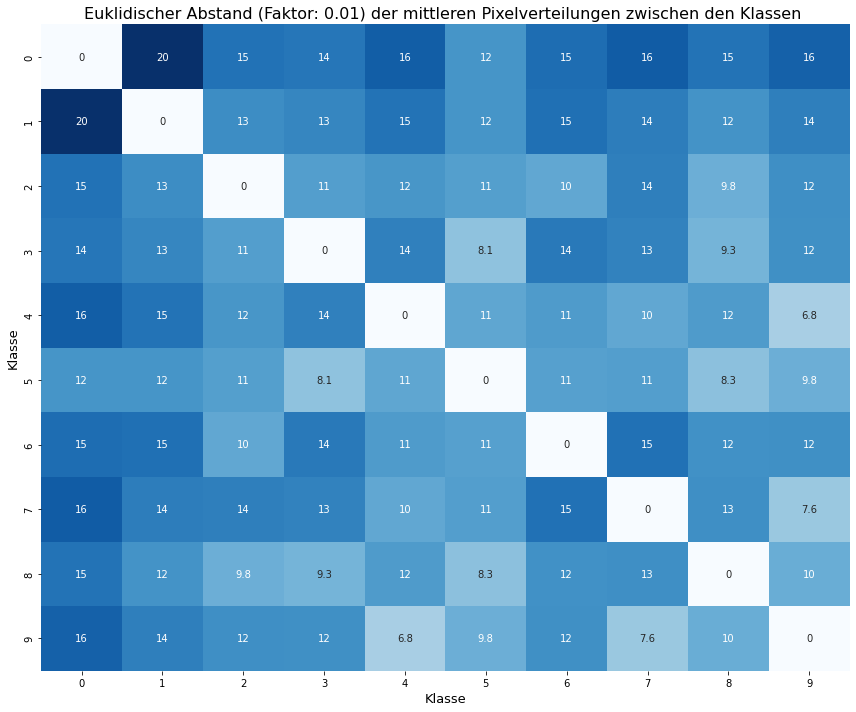

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(euclidean_distances/100, cmap="Blues", annot=True, cbar=False) #YlGnBu
plt.title("Euklidischer Abstand (Faktor: 0.01) der mittleren Pixelverteilungen zwischen den Klassen ", fontsize=16)
plt.xlabel("Klasse", fontsize=13)
plt.ylabel("Klasse", fontsize=13)
plt.tight_layout()
# plt.savefig("generated/plots/euclidean_distances_mean_pixel_dist_div100.svg")
plt.show()

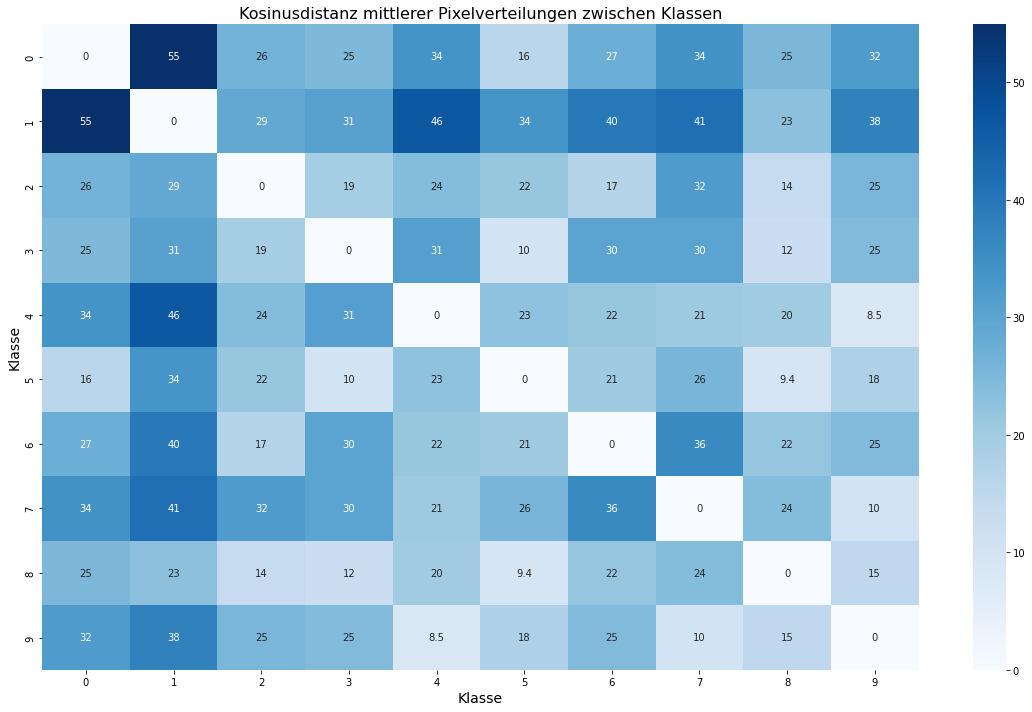

In [18]:
# Cosine
plt.figure(figsize=(16,10))
sns.heatmap(cosine_distances*100, cmap="Blues", annot=True) #YlGnBu
plt.title("Kosinusdistanz mittlerer Pixelverteilungen zwischen Klassen", fontsize=16)
plt.xlabel("Klasse", fontsize=14)
plt.ylabel("Klasse", fontsize=14)
plt.tight_layout()
#plt.savefig("generated/plots/euclidean_distances_mean_pixel_dist_x_100.svg")
plt.show()

# Read in accuracies

## Anzahl Pre-Training Epochen Evaluation

In [19]:
accuracy_dict_pre_eval = {}
gpath = "/Volumes/GoogleDrive-117672631860430354525/Meine Ablage/"
eval_path= "/Users/fredo/Dev/old/"
post = 300

for pre in range(50,350,50):
  p = eval_path + f"pre_epochen_vergleich/images_{pre}pre_{post}post/"
  for i in [3,4,8,9]:
    accuracy_dict_pre_eval[f"{pre}{i}"] = pd.read_csv(p+f"{i}/accuracy_{i}.csv", names=["epoch","accuracy"], header=0)
    for j in [3,4,8,9]:
      if i != j:
        accuracy_dict_pre_eval[f"{pre}{j}{i}"] = pd.read_csv(p+f"{j}{i}/accuracy_{j}{i}.csv", names=["epoch","accuracy"], header=0)


In [20]:
# Mean
mean_acc_dict_pre_eval = {}
mean_acc_plot_dict = {}

for pre in range(50,350,50):
  for i in range(300):
    mean_acc_dict_pre_eval[f"{pre}{i}"] = []
    for curr in [3,4,8,9]:
      #mean_acc_dict_pre_eval[f"{pre}{i}"].append(accuracy_dict_pre_eval[f"{pre}{curr}"].accuracy[i])
      for j in [3,4,8,9]:
        if j != curr:
          mean_acc_dict_pre_eval[f"{pre}{i}"].append(accuracy_dict_pre_eval[f"{pre}{j}{curr}"].accuracy[i])
    mean_acc_dict_pre_eval[f"{pre}{i}"] = np.mean(mean_acc_dict_pre_eval[f"{pre}{i}"])
  
  mean_acc_plot_dict[f"{pre}"] = []
  for i in range(300):
    mean_acc_plot_dict[f"{pre}"].append(mean_acc_dict_pre_eval[f"{pre}{i}"])

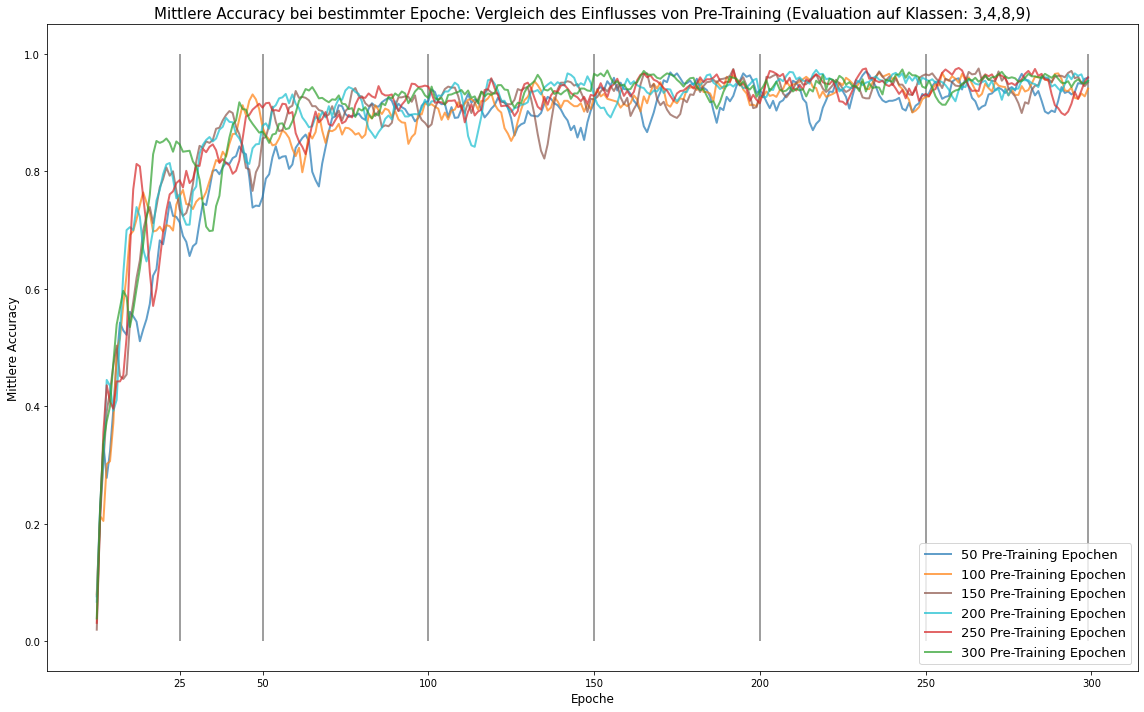

In [21]:
colors = ["tab:blue","tab:orange","tab:brown","tab:cyan","tab:red","tab:green"]

plt.figure(figsize=(16,10))
c = 0
for pre in range(50,350,50):
  #print(f"{pre}: Epoch {i}      {np.mean(mean_acc_plot_dict[f'{pre}'][:i])}")
  plt.plot(np.arange(300), mean_acc_plot_dict[f'{pre}'], alpha=0.7, color=colors[c], linewidth=2) #[epoch-3:epoch+3]
  c += 1
      
plt.legend([f"{50} Pre-Training Epochen",f"{100} Pre-Training Epochen",f"{150} Pre-Training Epochen",f"{200} Pre-Training Epochen",f"{250} Pre-Training Epochen",f"{300} Pre-Training Epochen"], fontsize=13)
plt.title("Mittlere Accuracy bei bestimmter Epoche: Vergleich des Einflusses von Pre-Training (Evaluation auf Klassen: 3,4,8,9)", fontsize=15)
plt.xlabel("Epoche", fontsize=12)
plt.ylabel("Mittlere Accuracy", fontsize=12) 
plt.xticks([25,50,100,150,200,250,300])
plt.vlines([25,50,100,150,200,250,299], ymin=0, ymax=1, color="black", alpha=0.5, linewidth=1.5)
plt.tight_layout()
#plt.savefig("generated/plots/plot_mean_acc_AT_epoch_pre_train_compare.svg")
plt.show()

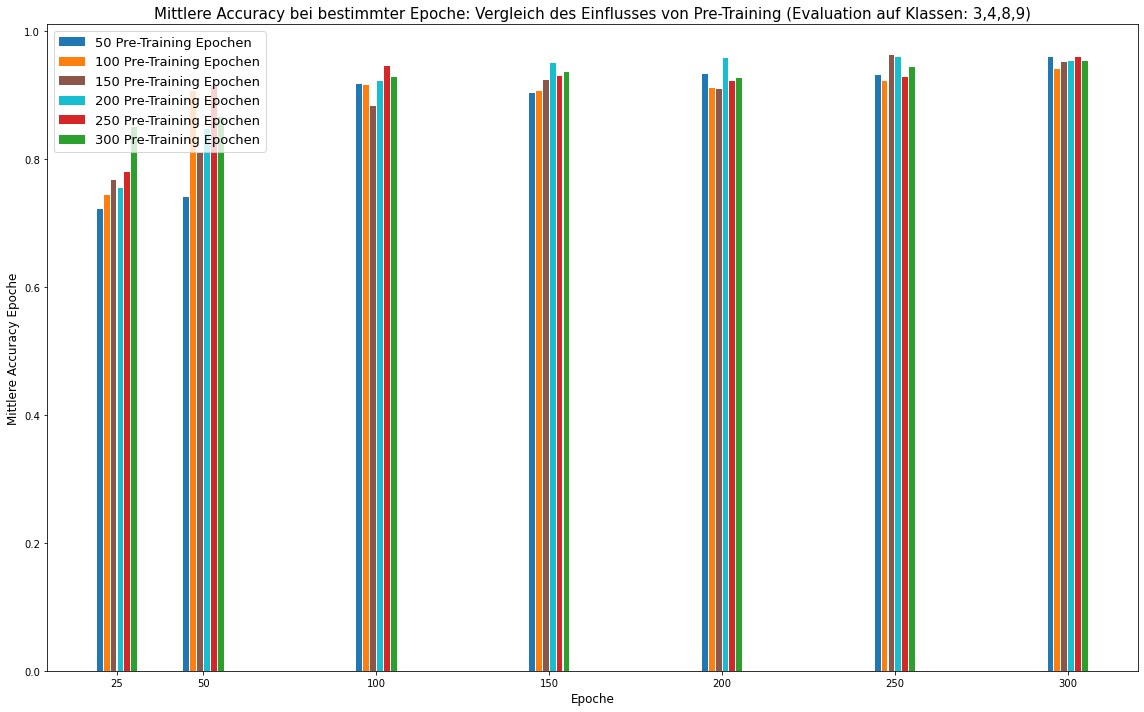

In [22]:
colors = ["tab:blue","tab:orange","tab:brown","tab:cyan","tab:red","tab:green"]

plt.figure(figsize=(16,10))
for epoch in [24,49,99,149,199,249,299]:
  pos = -4
  c = 0
  for pre in range(50,350,50):
    #print(f"{pre}: Epoch {i}      {np.mean(mean_acc_plot_dict[f'{pre}'][:i])}")
    plt.bar(epoch+pos, mean_acc_dict_pre_eval[f'{pre}{epoch}'], color=colors[c], width=1.7) #[epoch-3:epoch+3]
    pos += 2
    c+=1
plt.legend([f"{50} Pre-Training Epochen",f"{100} Pre-Training Epochen",f"{150} Pre-Training Epochen",f"{200} Pre-Training Epochen",f"{250} Pre-Training Epochen",f"{300} Pre-Training Epochen"], fontsize=13)
plt.title("Mittlere Accuracy bei bestimmter Epoche: Vergleich des Einflusses von Pre-Training (Evaluation auf Klassen: 3,4,8,9)", fontsize=15)
plt.xlabel("Epoche", fontsize=12)
plt.ylabel("Mittlere Accuracy Epoche", fontsize=12) 
plt.xticks([25,50,100,150,200,250,300])
plt.tight_layout()
#plt.savefig("generated/plots/mean_acc_AT_epoch_pre_train_compare.svg")
plt.show()

## With Pre-Training

In [23]:
accuracy_dict = {}
gpath = "/Volumes/GoogleDrive-117672631860430354525/Meine Ablage/"
path= "/Users/fredo/Dev/gans_mnist/"
post = 300

for pre in [100,200,300]:
  p = gpath + f"generated/images_{pre}pre_{post}post/"
  for i in range(10):
    accuracy_dict[f"{pre}{i}"] = pd.read_csv(p+f"{i}/accuracy_{i}.csv", names=["epoch","accuracy"], header=0)
    for j in range(10):
      if i != j:
        accuracy_dict[f"{pre}{j}{i}"] = pd.read_csv(p+f"{j}{i}/accuracy_{j}{i}.csv", names=["epoch","accuracy"], header=0)


In [24]:
accuracy_dict["20049"]

,epoch,accuracy
0,0,0.039062
1,1,0.078125
2,2,0.304688
3,3,0.507812
4,4,0.546875
...,...,...
295,295,0.929688
296,296,0.921875
297,297,0.906250
298,298,0.906250


### Compare Accuracies

In [25]:
# Test
"""for pre in [300]: #[100,200,300]:
  for curr in range(10):
    plt.figure(figsize=(10,5))
    plt.plot(accuracy_dict[f"{pre}{curr}"][:100].accuracy, "--", label=f"{curr}", linewidth=2.5)
    for j in range(10):
      if j != curr:
        plt.plot(accuracy_dict[f"{pre}{j}{curr}"][:100].accuracy, label=f"{j}{curr}", linewidth=1.5,alpha=0.5) 
        plt.title(f"Pre: {pre}")
    plt.legend()
    plt.tight_layout()
    plt.show()"""

'for pre in [300]: #[100,200,300]:\n  for curr in range(10):\n    plt.figure(figsize=(10,5))\n    plt.plot(accuracy_dict[f"{pre}{curr}"][:100].accuracy, "--", label=f"{curr}", linewidth=2.5)\n    for j in range(10):\n      if j != curr:\n        plt.plot(accuracy_dict[f"{pre}{j}{curr}"][:100].accuracy, label=f"{j}{curr}", linewidth=1.5,alpha=0.5) \n        plt.title(f"Pre: {pre}")\n    plt.legend()\n    plt.tight_layout()\n    plt.show()'

### Mean and Median Accuracies

In [26]:
# Mean acc at epoch x with different length of pre-training
mean_acc_dict_2 = {}
for pre in [100,200,300]:
  for i in range(300):
    mean_acc_dict_2[f"{pre}{i}"] = []
    for curr in range(10):
      for j in range(10):
        if curr != j:
          mean_acc_dict_2[f"{pre}{i}"].append(accuracy_dict[f"{pre}{curr}{j}"].accuracy[i])
    mean_acc_dict_2[f"{pre}{i}"] = sum(mean_acc_dict_2[f"{pre}{i}"]) / len(mean_acc_dict_2[f"{pre}{i}"])

# Median acc at epoch x with different length of pre-training
median_acc_dict_2 = {}
for pre in [100,200,300]:
  for i in range(300):
    median_acc_dict_2[f"{pre}{i}"] = []
    for curr in range(10):
      for j in range(10):
        if curr != j:
          median_acc_dict_2[f"{pre}{i}"].append(accuracy_dict[f"{pre}{curr}{j}"].accuracy[i])
    median_acc_dict_2[f"{pre}{i}"] = np.median(median_acc_dict_2[f"{pre}{i}"])

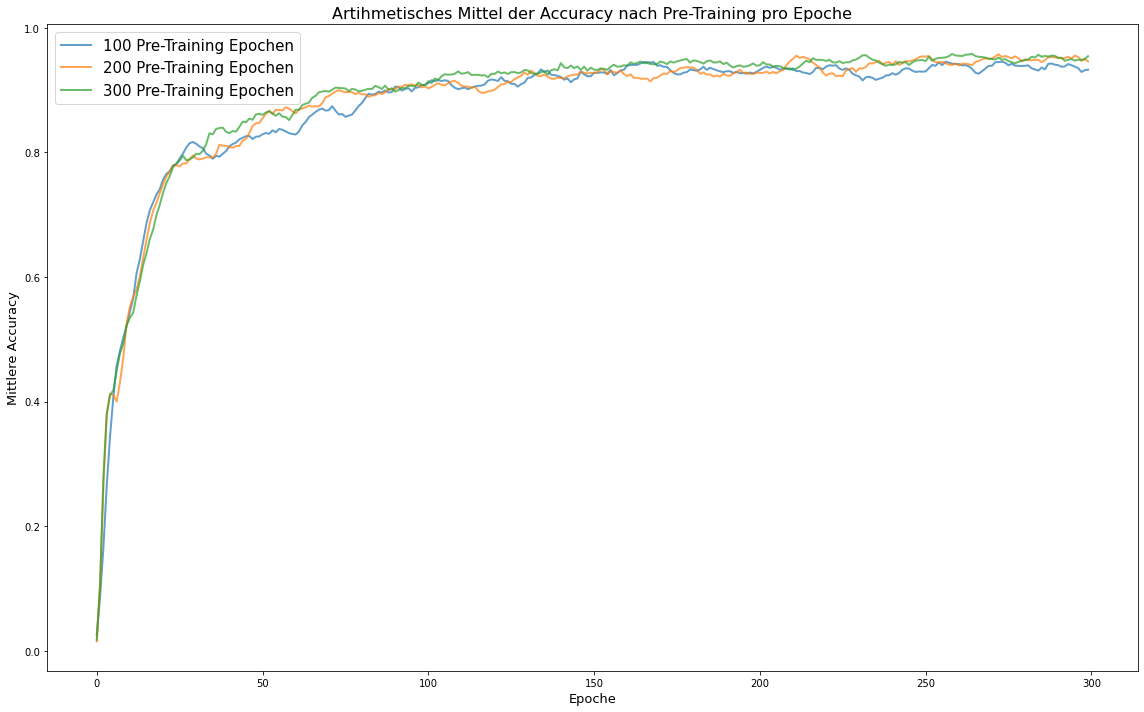

In [27]:
lst_100 = []
lst_200 = []
lst_300 = []
for i in range(300):
  lst_100.append(mean_acc_dict_2[f"100{i}"])
  lst_200.append(mean_acc_dict_2[f"200{i}"])
  lst_300.append(mean_acc_dict_2[f"300{i}"])

plt.figure(figsize=(16,10))
plt.plot(np.arange(300), lst_100, alpha=0.7, linewidth=2, label="100 Pre-Training Epochen")
plt.plot(np.arange(300), lst_200, alpha=0.7, linewidth=2, label="200 Pre-Training Epochen")
plt.plot(np.arange(300), lst_300, alpha=0.7, linewidth=2, label="300 Pre-Training Epochen")
plt.legend(fontsize=15)
plt.title("Artihmetisches Mittel der Accuracy nach Pre-Training pro Epoche", fontsize=16)
plt.xlabel("Epoche", fontsize=13)
plt.ylabel("Mittlere Accuracy", fontsize=13)
plt.tight_layout()
#plt.savefig("generated/plots/mean_accuracy_pro_pre_training.svg")
plt.show()


In [28]:
# Mean
mean_acc_dict = {}
for pre in [100,200,300]:
  for curr in range(10):
    for i in range(10,310,10):
      mean_acc_dict[f"{pre}{curr}{i}"] = accuracy_dict[f"{pre}{curr}"][:i].accuracy.mean()
      for j in range(10):
        if j != curr:
          for i in range(10,310,10):
            mean_acc_dict[f"{pre}{curr}{j}{i}"] = accuracy_dict[f"{pre}{j}{curr}"][:i].accuracy.mean()

In [29]:
# Median
median_acc_dict = {}
for pre in [100,200,300]:
  for curr in range(10):
    median_acc_dict[f"{pre}{curr}"] = np.median(accuracy_dict[f"{pre}{curr}"][:i].accuracy)
    for j in range(10):
      if j != curr:
        for i in range(10,310,10):
          median_acc_dict[f"{pre}{curr}{j}{i}"] = np.median(accuracy_dict[f"{pre}{j}{curr}"][:i].accuracy)

In [30]:
# Mean Overall with Pre-Training

overall_mean_acc = {100:[],200:[],300:[]}
overall_median_acc = {100:[],200:[],300:[]}
for pre in [100,200,300]:
  lst_mean = []
  lst_median = []
  for epoch in range(10,310,10):
    for curr in range(10):
      for j in range(10):
        if curr != j:
          lst_mean.append(mean_acc_dict[f"{pre}{curr}{j}{epoch}"])
          lst_median.append(median_acc_dict[f"{pre}{curr}{j}{epoch}"])
    overall_mean_acc[pre].append(np.mean(lst_mean))
    overall_median_acc[pre].append(np.median(lst_median))

# Mittlere Accuracy pro Pre-Training bis Epoche 100
for pre in [100,200,300]:
  print(pre, "   ", (np.mean(overall_mean_acc[pre])*100).round(4), "%")

100     66.3369 %
200     66.7818 %
300     67.4261 %


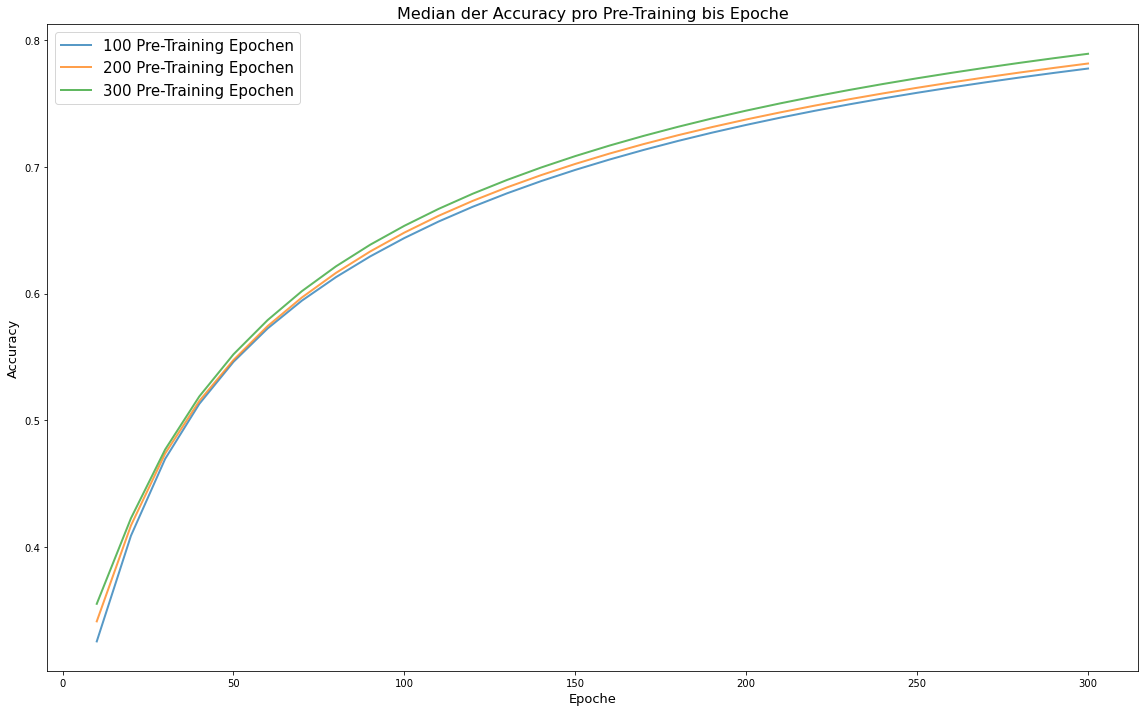

In [31]:
plt.figure(figsize=(16,10))
for pre in [100,200,300]:
  plt.plot(np.arange(10,310,10), overall_mean_acc[pre], label=f"{pre} Pre-Training Epochen", linewidth=2, alpha=0.75)
plt.legend(fontsize=15)
plt.title("Median der Accuracy pro Pre-Training bis Epoche", fontsize=16)
plt.xlabel("Epoche", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.tight_layout()
#plt.savefig("generated/plots/median_accuracy_pro_pre_training.svg")
plt.show()

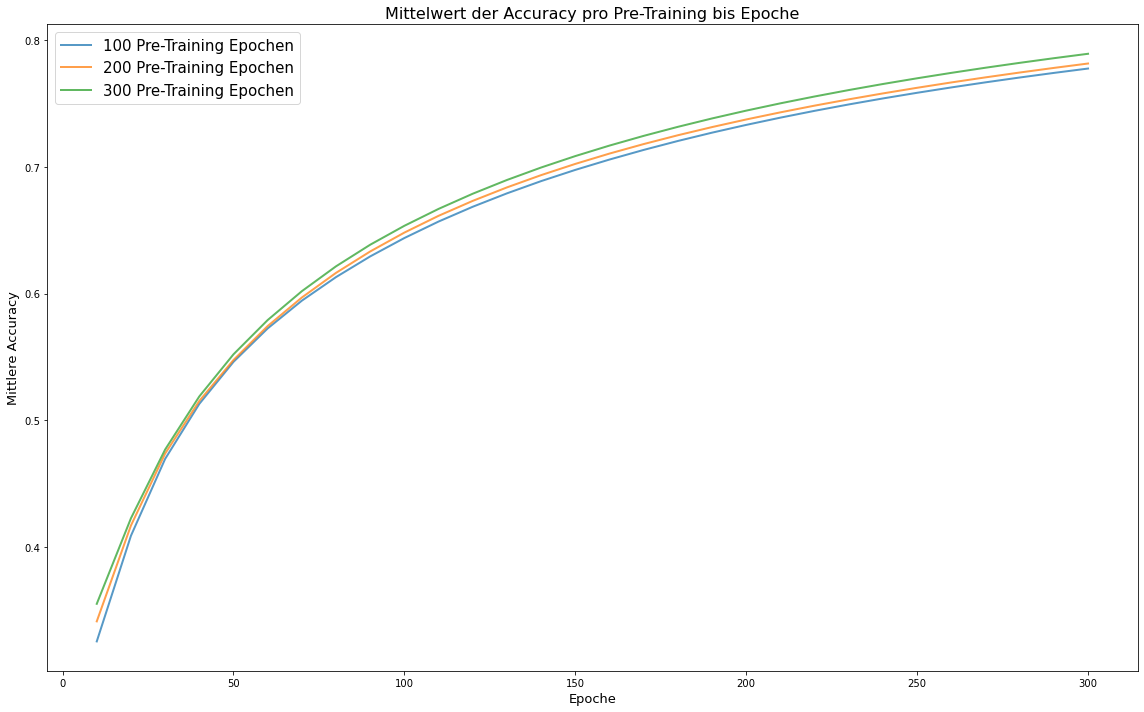

In [32]:
plt.figure(figsize=(16,10))
for pre in [100,200,300]:
  plt.plot(np.arange(10,310,10), overall_mean_acc[pre], label=f"{pre} Pre-Training Epochen", linewidth=2, alpha=0.75)
plt.legend(fontsize=15)
plt.title("Mittelwert der Accuracy pro Pre-Training bis Epoche", fontsize=16)
plt.xlabel("Epoche", fontsize=13)
plt.ylabel("Mittlere Accuracy", fontsize=13)
plt.tight_layout()
#plt.savefig("generated/plots/mean_accuracy_pro_pre_training.svg")
plt.show()

In [33]:
# Median

overall_median_acc = {100:[],200:[],300:[]}
for epoch in range(10,310,10):
  for pre in [100,200,300]:
    lst = []
    for curr in range(10):
    # for pre in range(50,350,50):
      for j in range(10):
        if curr != j:
          lst.append(median_acc_dict[f"{pre}{curr}{j}{epoch}"])
    #print(epoch, pre, np.mean(lst))
    overall_median_acc[pre].append(np.mean(lst))

# Mittlere Accuracy pro Pre-Training bis Epoche 100
for pre in [100,200,300]:
  print(pre, "   ", (np.median(overall_mean_acc[pre])*100).round(4), "%")

100     70.1593 %
200     70.6311 %
300     71.2543 %


# Read in Accuracies: No Pre-Training

In [34]:
accuracy_dict_no_pre = {}
path = "/Users/fredo/Dev/gans_mnist/generated/FINAL/300_epochs-8000_data-128_batch/"

for i in range(10):
  accuracy_dict_no_pre[f"{i}"] = pd.read_csv(path+f"{i}/accuracy_{i}.csv", names=["epoch","accuracy"], header=0)

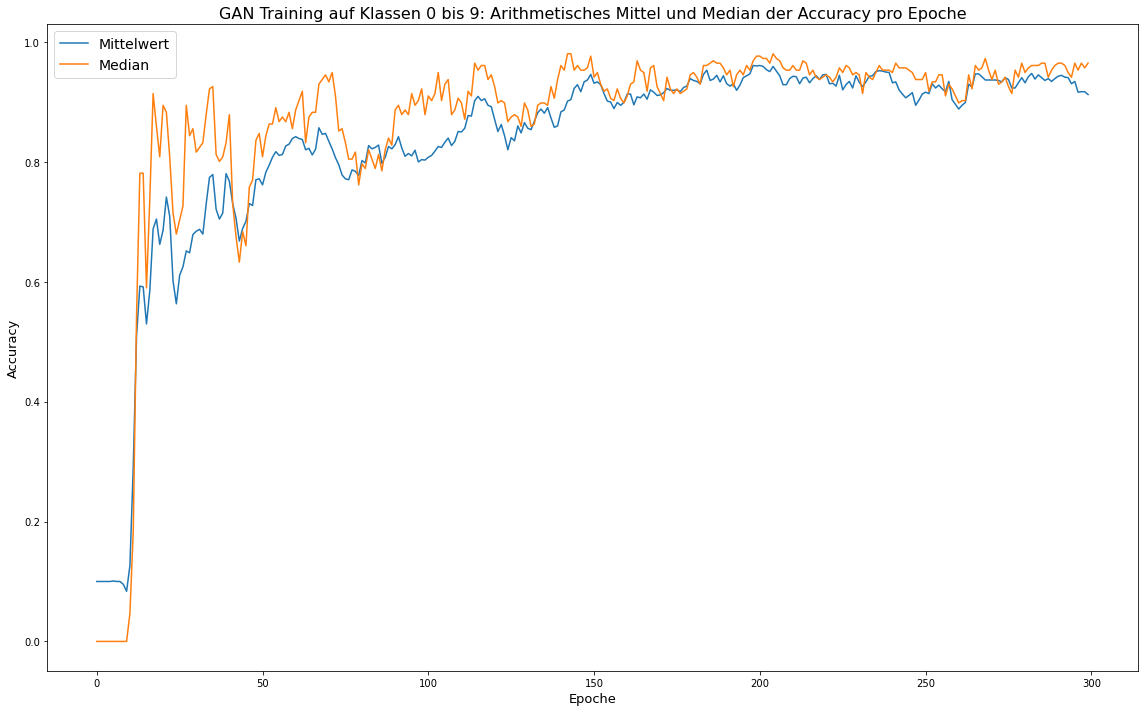

In [35]:
acc = [300*0]
acc_med = {key:[] for key in range(300)}
for i in range(10):
  acc += accuracy_dict_no_pre[f"{i}"].accuracy
  for num, value in enumerate(accuracy_dict_no_pre[f"{i}"].accuracy):
    acc_med[num].append(value)
acc = acc/10


plt.figure(figsize=(16,10))
plt.plot(np.arange(0,300,1), acc, label="Mittelwert")
plt.plot(np.arange(0,300,1), [np.median(x) for x in acc_med.values()], label="Median")
plt.title("GAN Training auf Klassen 0 bis 9: Arithmetisches Mittel und Median der Accuracy pro Epoche", fontsize=16)
plt.xlabel("Epoche", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.legend(fontsize=14)
plt.tight_layout()
#plt.savefig("generated/plots/no_pre_mean_median_accuracy.svg")
plt.show()

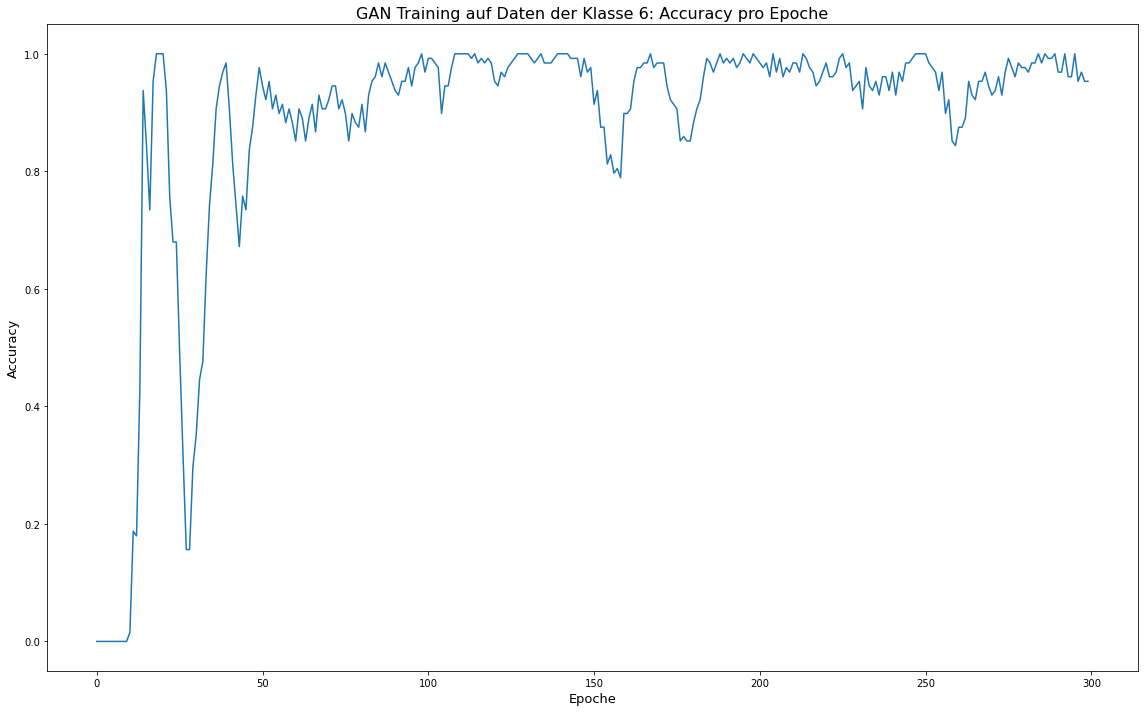

In [36]:
plt.figure(figsize=(16,10))
plt.plot(np.arange(0,300,1), accuracy_dict_no_pre["6"].accuracy)
plt.title("GAN Training auf Daten der Klasse 6: Accuracy pro Epoche", fontsize=16)
plt.xlabel("Epoche", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.tight_layout()
#plt.savefig("generated/plots/accuracy_6.svg")
plt.show()

# FINAL Evaluation: 300 Pre-Epochs

In [37]:
post = 300
gpath = "/Volumes/GoogleDrive-117672631860430354525/Meine Ablage/"

for pre in [100,200,300]:
  p = gpath + f"generated/images_{pre}pre_{post}post/"

In [38]:
final_dict = {}

path = "/Users/fredo/Dev/gans_mnist/generated/FINAL/images_300pre_300post/"
#path = "/Volumes/GoogleDrive-117672631860430354525/Meine Ablage/"


for i in range(10):
  final_dict[f"{i}"] = pd.read_csv(path+f"{i}/accuracy_{i}.csv", names=["epoch","accuracy"], header=0)
  for j in range(10):
    if i != j:
      final_dict[f"{i}{j}"] = pd.read_csv(path+f"{i}{j}/accuracy_{i}{j}.csv", names=["epoch","accuracy"], header=0)

### Moving Average

In [39]:
# Parameters

rolling_window = 10

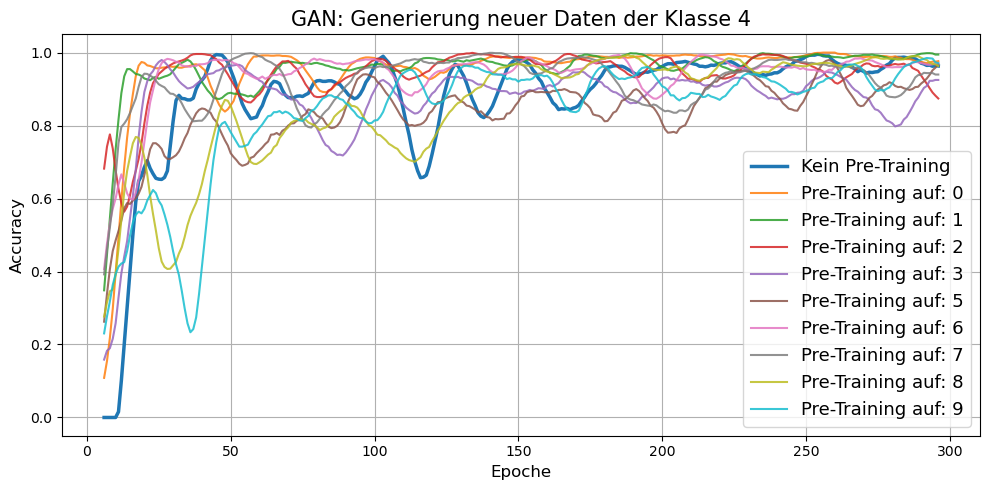

In [40]:
plt.style.use('default')

for i in [4]:
  plt.figure(figsize=(10,5))
  plt.title(f"GAN: Generierung neuer Daten der Klasse {i}", fontsize=15)
  plt.plot(np.arange(np.ceil(rolling_window/2)+1,301,1), final_dict[f"{i}"].accuracy.rolling(rolling_window, center=True).mean().to_list()[int(np.ceil(rolling_window/2)):], label=f"Kein Pre-Training", linewidth=2.5)
  for j in range(10):
    if i != j:
      plt.plot(np.arange(np.ceil(rolling_window/2)+1,301,1), final_dict[f"{i}{j}"].accuracy.rolling(rolling_window, center=True).mean().to_list()[int(np.ceil(rolling_window/2)):], label=f"Pre-Training auf: {j}", linewidth=1.5, alpha=0.85)
  plt.legend(fontsize=13)
  plt.xlabel("Epoche", fontsize=12)
  plt.ylabel("Accuracy", fontsize=12)
  plt.grid(visible=True)
  plt.tight_layout()
  plt.show()

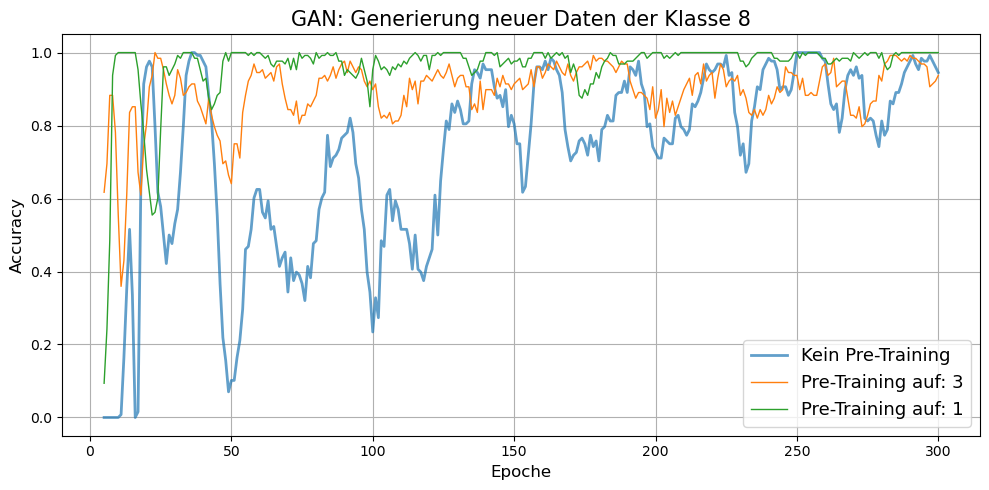

In [41]:
plt.style.use('default')

for i in [8]:
  plt.figure(figsize=(10,5))
  plt.title(f"GAN: Generierung neuer Daten der Klasse {i}", fontsize=15)
  plt.plot(np.arange(5,301,1), final_dict[f"{i}"].accuracy.to_list()[4:], label=f"Kein Pre-Training", linewidth=2, alpha=0.7)
  for j in [3, 1]:
    if i != j:
      plt.plot(np.arange(5,301,1), final_dict[f"{i}{j}"].accuracy.to_list()[4:], label=f"Pre-Training auf: {j}", linewidth=1, alpha=1)
  plt.legend(fontsize=13)
  plt.xlabel("Epoche", fontsize=12)
  plt.ylabel("Accuracy", fontsize=12)
  plt.grid(visible=True)
  plt.tight_layout()
  plt.show()

In [42]:
mean_no_pre = [300*0]
mean_pre = [300*0]
median_no_pre = {key:[] for key in range(300)}
median_pre = {key:[] for key in range(300)}

for i in range(10):
  mean_no_pre += final_dict[f"{i}"].accuracy
  for num, value in enumerate(final_dict[f"{i}"].accuracy):
    median_no_pre[num].append(value)
  for j in range(10):
    if i != j:
      for num, value in enumerate(final_dict[f"{i}{j}"].accuracy):
        median_pre[num].append(value)
      mean_pre += final_dict[f"{i}{j}"].accuracy
      
mean_pre = mean_pre / 90
mean_no_pre = mean_no_pre / 10

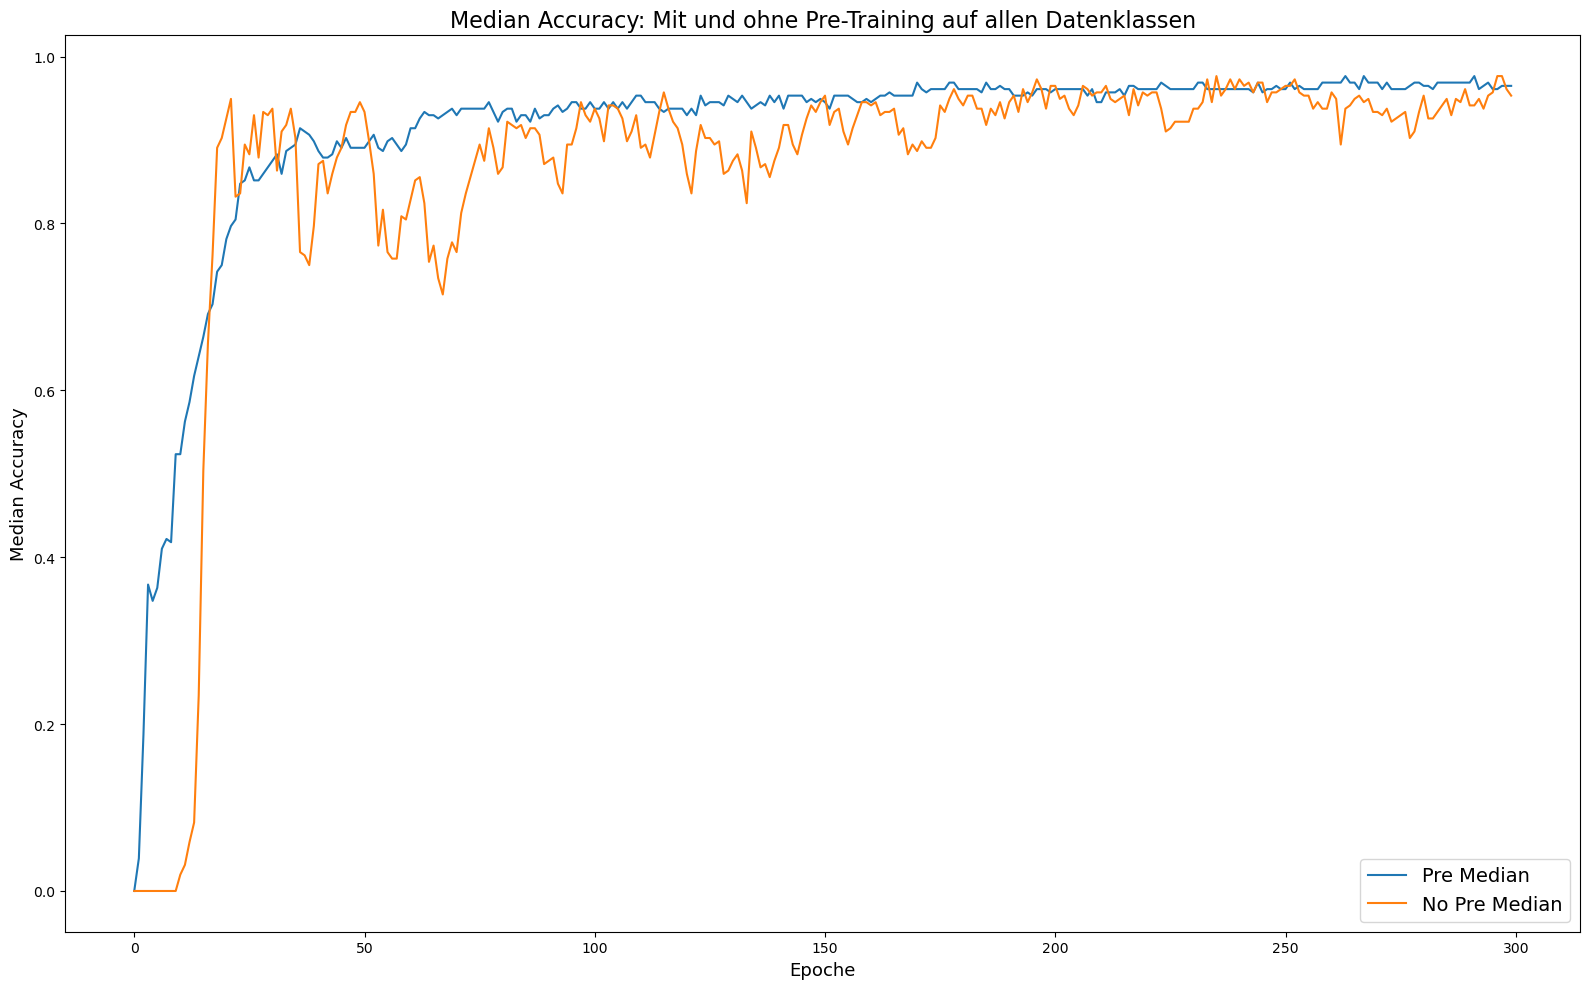

In [43]:
# With Pre vs No-Pre (mean)

plt.figure(figsize=(16,10))
#plt.plot(np.arange(300), mean_pre, label="Mit Pre-Training")
#plt.plot(np.arange(300), mean_no_pre, label="Ohne Pre-Training")
plt.plot(np.arange(300), [np.median(x) for x in median_pre.values()], label="Pre Median")
plt.plot(np.arange(300), [np.median(x) for x in median_no_pre.values()], label="No Pre Median")
plt.title("Median Accuracy: Mit und ohne Pre-Training auf allen Datenklassen", fontsize=16)
plt.xlabel("Epoche", fontsize=13)
plt.ylabel("Median Accuracy", fontsize=13)
plt.legend(fontsize=14)
plt.tight_layout()
#plt.savefig("generated/plots/pre_vs_no_pre_mean.svg")
plt.show()

## Numerical Analysis

In [44]:
rolling_window = 10

# Rolling average
final_dict_rolling = {}
for i in range(10):
  final_dict_rolling[f"{i}"] = pd.DataFrame(columns=[str(x) for x in range(10)])
  final_dict_rolling[f"{i}"][f"{i}"] = final_dict[f"{i}"].accuracy.rolling(rolling_window, center=True).mean()#[list(np.arange(5,104,5))].round(4)*100
  for j in range(10):
    if i != j:
      final_dict_rolling[f"{i}"][f"{j}"] = final_dict[f"{i}{j}"].accuracy.rolling(rolling_window, center=True).mean()#[list(np.arange(5,104,5))].round(4)*100

#### Separate dataset by generated classes

In [45]:
# Accuracy per epoch
pre_trained_0_to_9_complete = {}
for i in range(10):
  pre_trained_0_to_9_complete[f"{i}"] = pd.DataFrame(columns=[str(x) for x in range(10)])
  pre_trained_0_to_9_complete[f"{i}"][f"{i}"] = final_dict[f"{i}"].accuracy

for i in range(10):
  for j in range(10):
    if i != j:
      #pre_trained_0_to_9_complete[f"{i}"][f"{i}"] = final_dict[f"{i}"].accuracy
      pre_trained_0_to_9_complete[f"{j}"][f"{i}"] = final_dict[f"{i}{j}"].accuracy


# Rolling average
rolling_window = 10

pre_trained_0_to_9_complete_rolling = {}
for i in range(10):
  pre_trained_0_to_9_complete_rolling[f"{i}"] = pd.DataFrame(columns=[str(x) for x in range(10)])
  pre_trained_0_to_9_complete_rolling[f"{i}"][f"{i}"] = final_dict[f"{i}"].accuracy.rolling(rolling_window, center=True).mean()[int(np.floor(rolling_window/2)):int(-np.floor(rolling_window/2))]
  for j in range(10):
    if i != j:
      pre_trained_0_to_9_complete_rolling[f"{i}"][f"{j}"] = final_dict[f"{i}{j}"].accuracy.rolling(rolling_window, center=True).mean()[int(np.floor(rolling_window/2)):int(-np.floor(rolling_window/2))]


In [46]:
for i in range(10):
  pre_trained_0_to_9_complete[str(i)].to_csv(f"generated/csv/{i}.csv", sep=";")

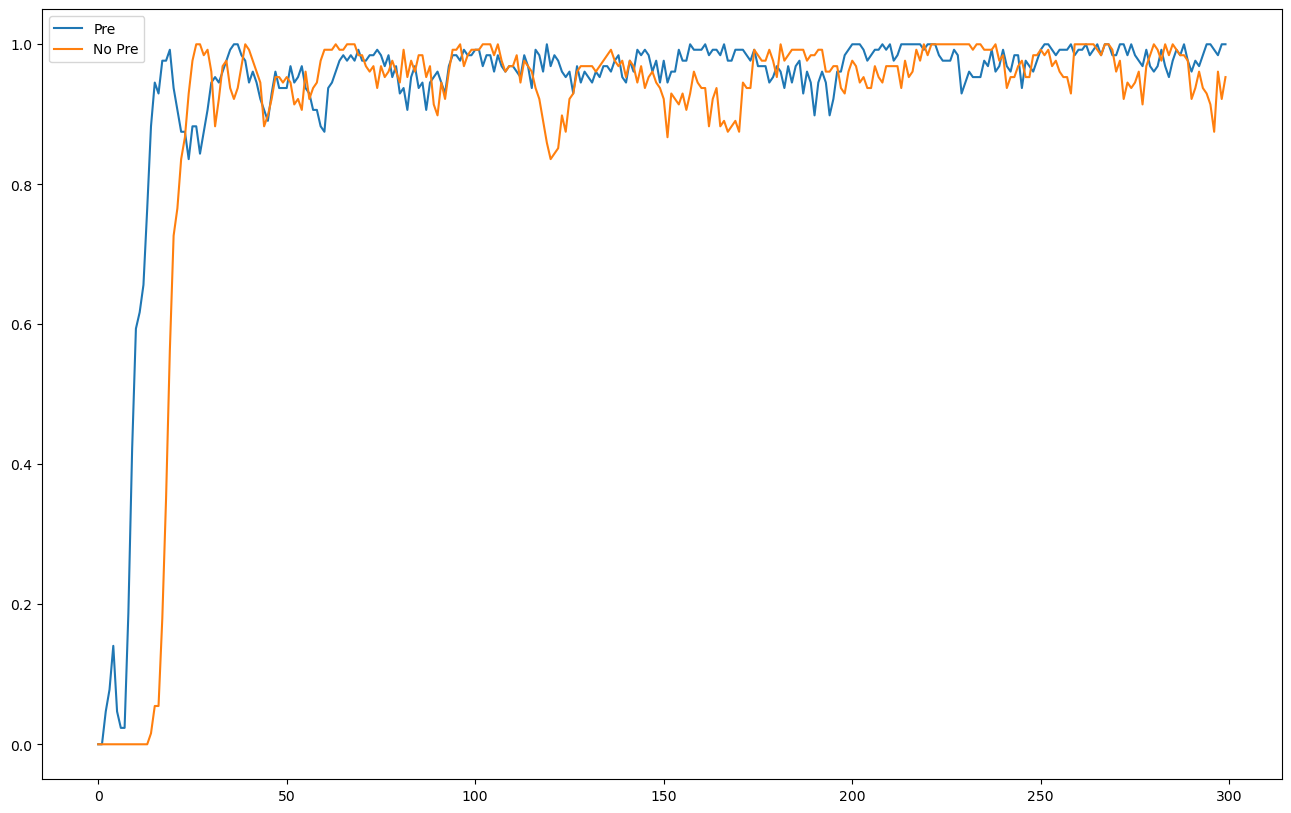

In [47]:
plt.figure(figsize=(16,10))
plt.plot(pre_trained_0_to_9_complete["0"]["9"], label="Pre")
plt.plot(pre_trained_0_to_9_complete["0"]["0"], label="No Pre")
plt.legend()
plt.show()

# Analyse Rolling Window Performances

In [48]:
rolling_window = 10

pre_trained_0_to_9_complete_rolling_90 = {}
for i in range(10):
  pre_trained_0_to_9_complete_rolling_90[f"{i}"] = pd.DataFrame(columns=[str(x) for x in range(10)])
  pre_trained_0_to_9_complete_rolling_90[f"{i}"][f"{i}"] = final_dict[f"{i}"].accuracy.rolling(rolling_window, center=True).mean()[int(np.floor(rolling_window/2)):int(-np.floor(rolling_window/2))]
  for j in range(10):
    if i != j:
      pre_trained_0_to_9_complete_rolling_90[f"{i}"][f"{j}"] = final_dict[f"{i}{j}"].accuracy.rolling(rolling_window, center=True).mean()[int(np.floor(rolling_window/2)):int(-np.floor(rolling_window/2))]


In [49]:
# Store first epoch the accuracy is greater than x in dictionary
pre_trained_0_to_9_complete_rolling_90_epoch = {}
threshold = 0.95

for i in range(10):
  #for line, value in enumerate(pre_trained_0_to_9_complete_rolling[f"{i}"][f"{i}"]):
    #if int(value) > threshold:
    #  pre_trained_0_to_9_complete_rolling_90[f"{i}"] = (line, value)
    #  break
  for j in range(10):
    #if i != j:
    for line, value in enumerate(pre_trained_0_to_9_complete_rolling_90[f"{i}"][f"{j}"]):
      if value > threshold:
        #print(f"{j}{i}")
        pre_trained_0_to_9_complete_rolling_90_epoch[f"{i}{j}"] = (line, value)
        break
      pre_trained_0_to_9_complete_rolling_90_epoch[f"{i}{j}"] = (300, None)

In [50]:
pre_trained_0_to_9_complete_rolling_90_epoch.values()

dict_values([(23, 0.9515625), (28, 0.9546875), (22, 0.9546875), (59, 0.9515625), (48, 0.9609375), (167, 0.9625), (34, 0.95078125), (59, 0.95546875), (102, 0.95234375), (91, 0.9578125), (24, 0.96015625), (10, 0.959375), (37, 0.95390625), (50, 0.95078125), (40, 0.95859375), (149, 0.9546875), (70, 0.959375), (115, 0.95390625), (138, 0.9578125), (188, 0.95390625), (15, 0.95390625), (12, 0.95234375), (0, 0.965625), (41, 0.9578125), (50, 0.9640625), (60, 0.9578125), (24, 0.9609375), (28, 0.95234375), (56, 0.95546875), (98, 0.95703125), (18, 0.96875), (15, 0.959375), (53, 0.9515625), (16, 0.96015625), (50, 0.96328125), (160, 0.9515625), (36, 0.95078125), (21, 0.9515625), (119, 0.95234375), (87, 0.9515625), (12, 0.9640625), (8, 0.9546875), (21, 0.95546875), (18, 0.96484375), (36, 0.9546875), (220, 0.95078125), (19, 0.9546875), (42, 0.9578125), (137, 0.95546875), (106, 0.95234375), (10, 0.9609375), (22, 0.959375), (16, 0.96640625), (79, 0.95234375), (25, 0.9515625), (300, None), (36, 0.9515625)

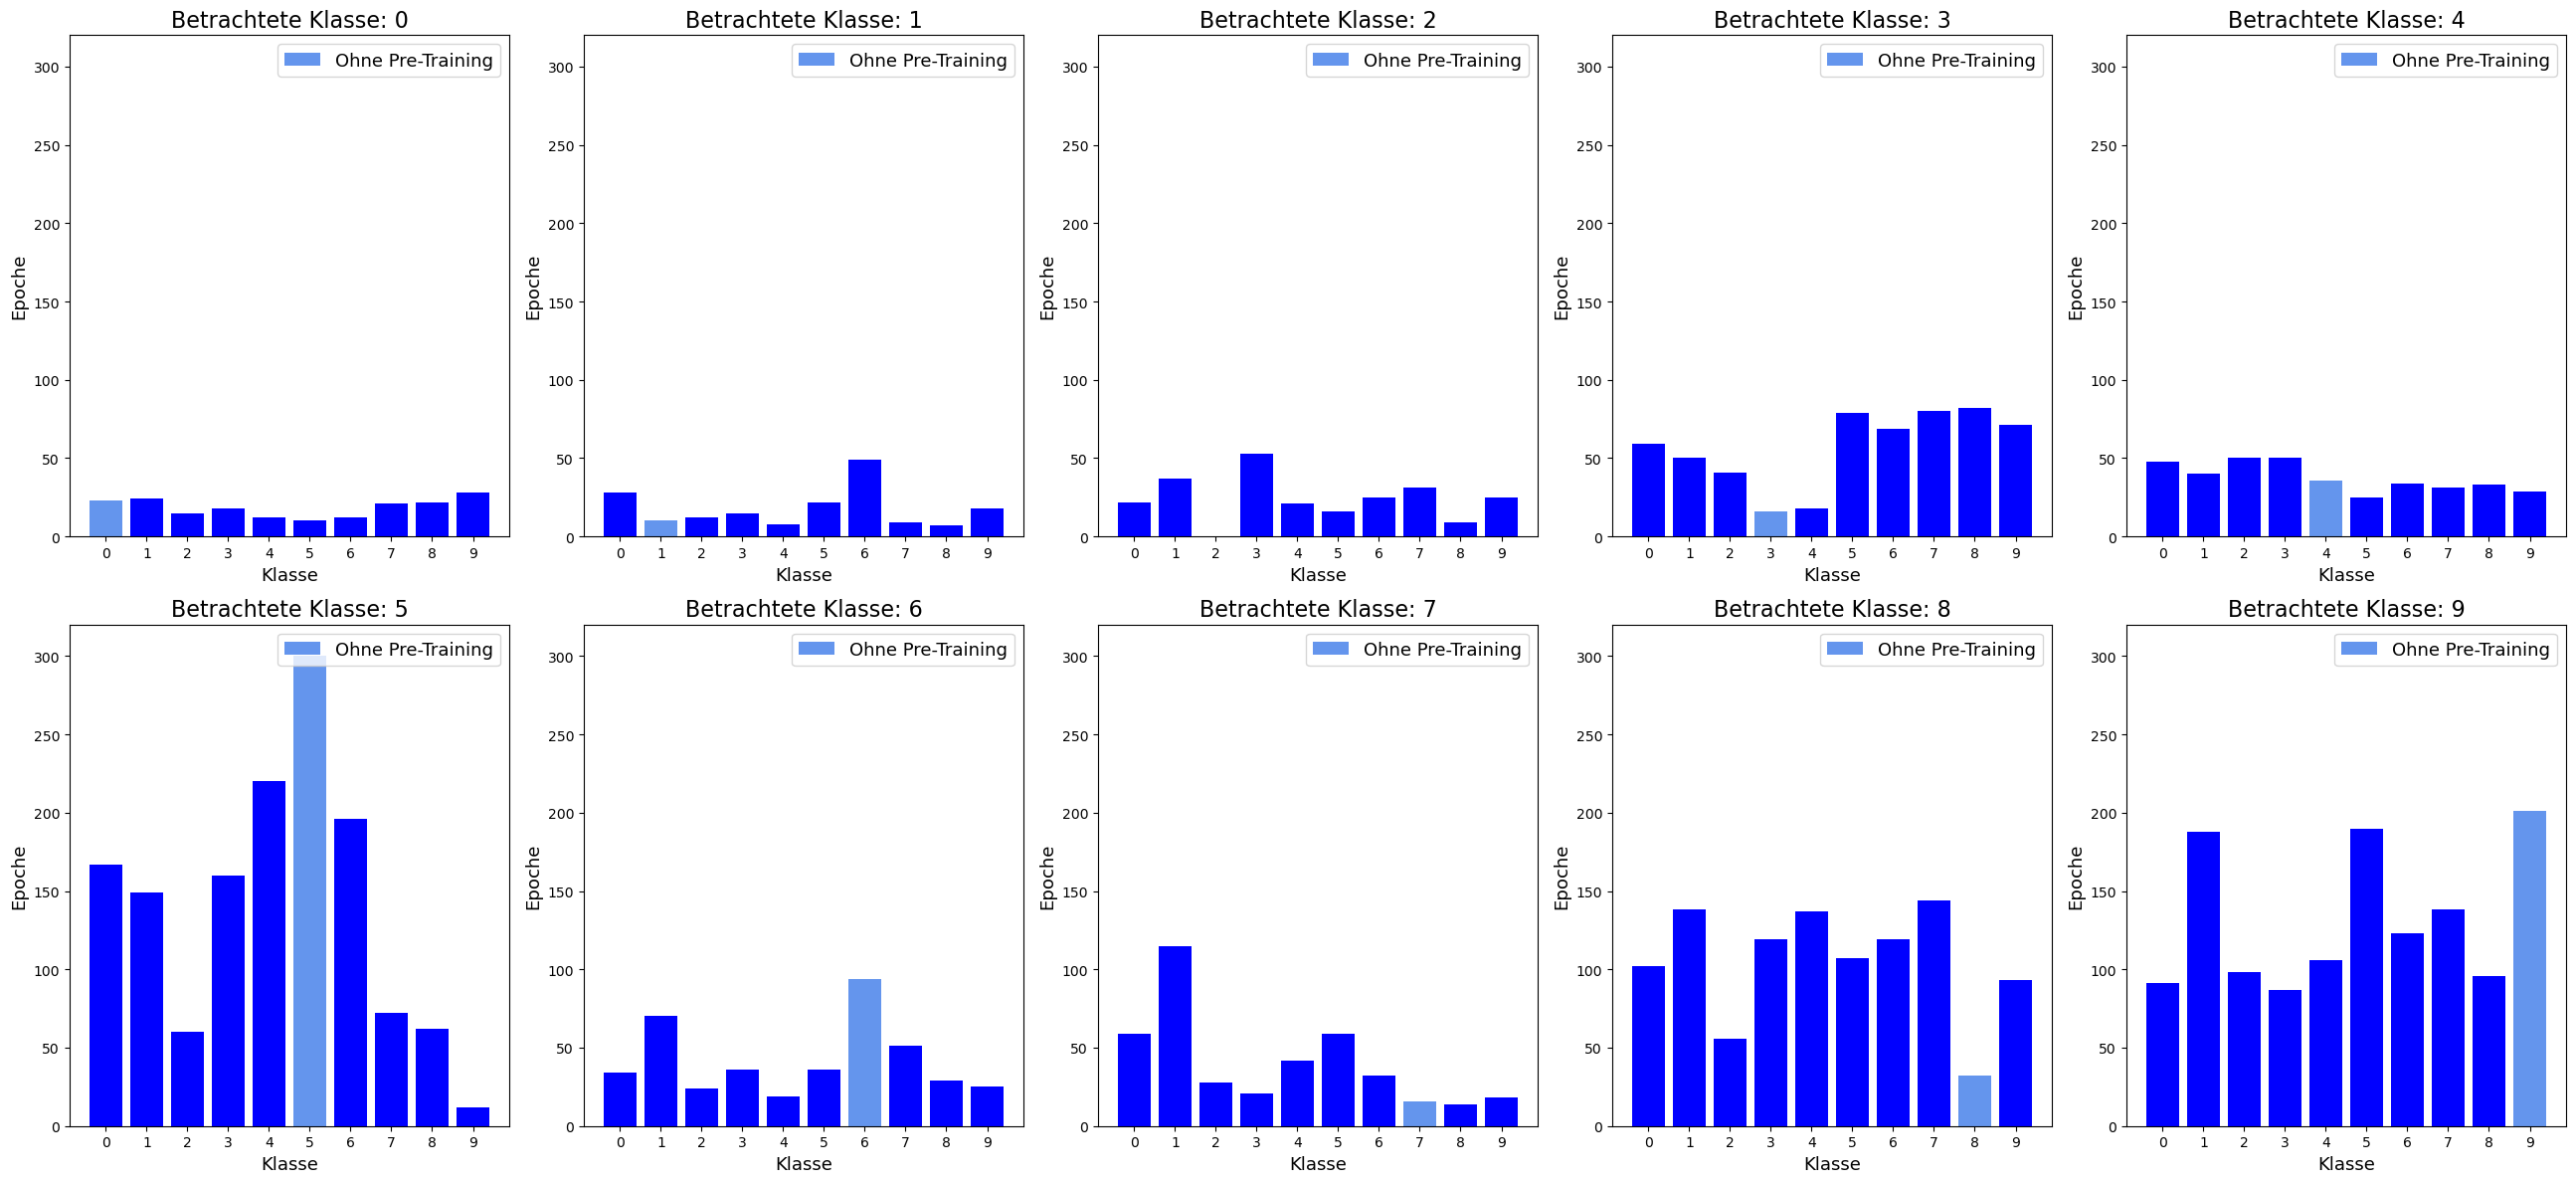

In [51]:
plt.figure(figsize=(26,12))
for i in range(10):
  #plt.figure(figsize=(12,6))
  plt.subplot(2,5,i+1)
  plt.title(f"Betrachtete Klasse: {i}", fontsize=16)
  #print(f"Generating {i}")
  #print(f"No Pre-Training:  {pre_trained_0_to_9_complete_rolling_90_epoch[f'{i}{i}']}")
  if pre_trained_0_to_9_complete_rolling_90_epoch[f'{i}{i}'][0] is None:
    plt.bar(i, 300, color="red", label="Ohne Pre-Training")
  else:
    plt.bar(i, pre_trained_0_to_9_complete_rolling_90_epoch[f'{i}{i}'][0], color="cornflowerblue", label="Ohne Pre-Training")
  for j in range(10):
    min = 9999
    max = -9999
    if i != j:
      if pre_trained_0_to_9_complete_rolling_90_epoch[f'{j}{i}'][0] is None:
        plt.bar( j, 300, color="red")
      else:
        plt.bar( j, pre_trained_0_to_9_complete_rolling_90_epoch[f'{j}{i}'], color="Blue")
  plt.xticks(np.arange(10))
  plt.ylim(0,320)
  
  plt.xticks(np.arange(0,10,1))
  plt.xlabel("Klasse",fontsize=13)
  plt.ylabel("Epoche", fontsize=13)
  plt.legend(fontsize=13)
  plt.tight_layout()
 
  #plt.legend()
  #plt.grid(True, axis="y")
plt.tight_layout()
#plt.savefig("generated/plots/epoch_until_95.svg")
plt.show()

## Residuals of accuracies

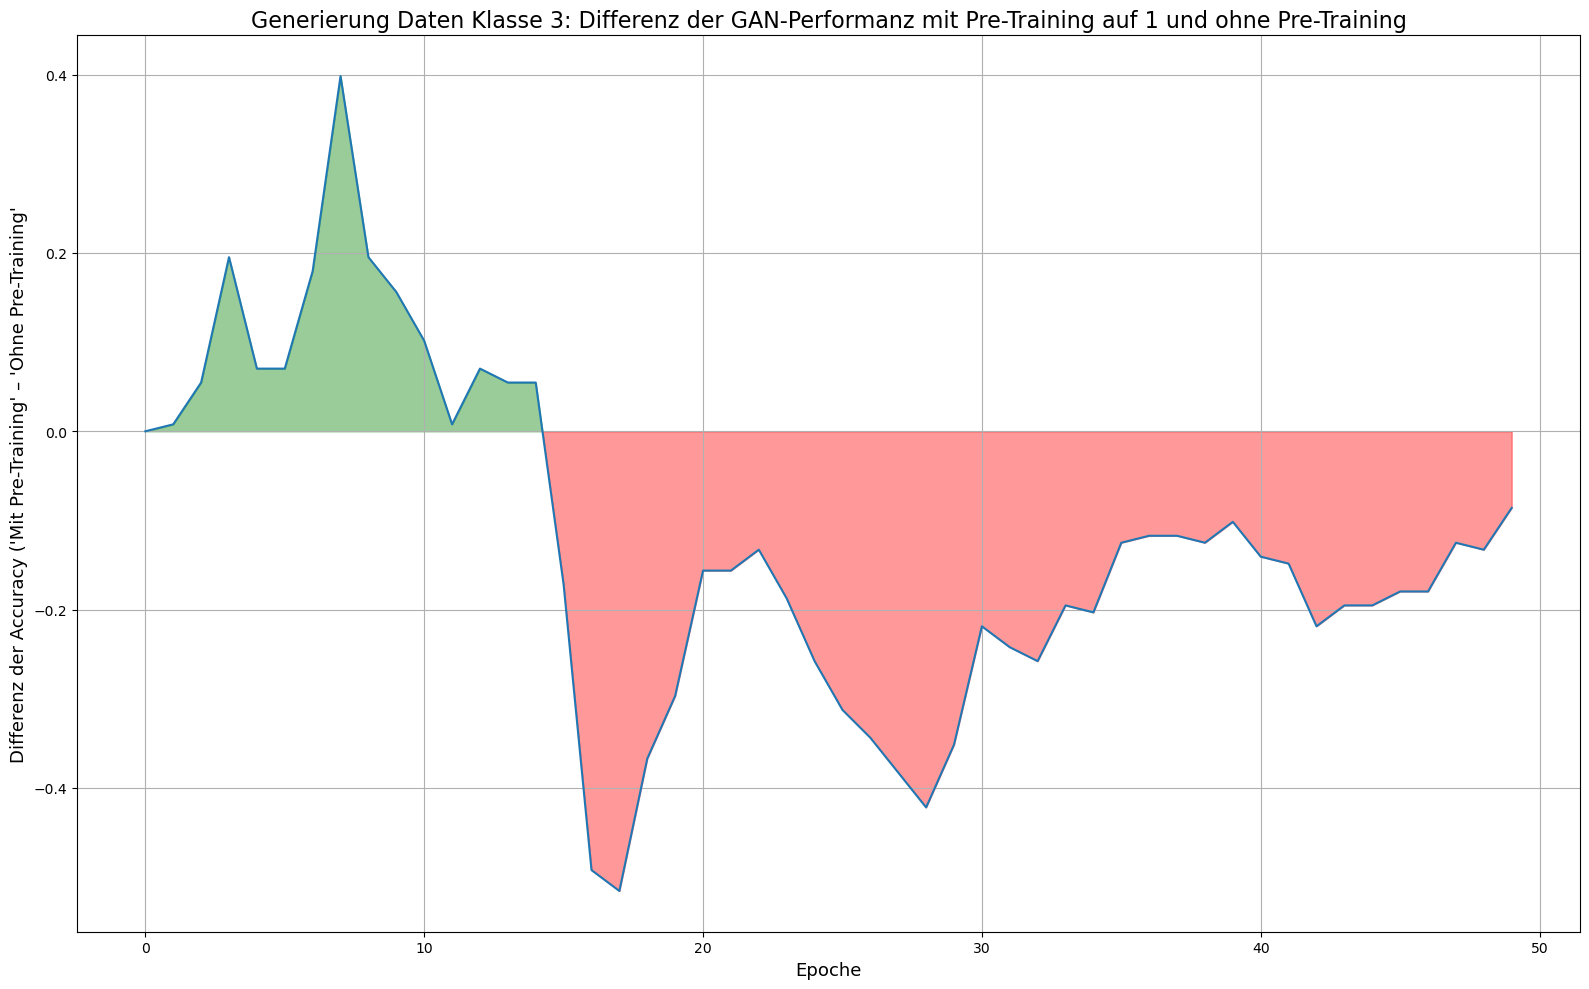

In [52]:
x = np.arange(50)
#x = np.arange(300)
y = (pre_trained_0_to_9_complete["3"]["1"] - pre_trained_0_to_9_complete["3"]["3"])[:50]

plt.figure(figsize=(16,10))
plt.plot(x, y)
plt.fill_between(x, 0, y, where=y>0, interpolate=True, color="green", alpha=0.4)
plt.fill_between(x, 0, y, where=y<0, interpolate=True, color="red", alpha=0.4)
plt.grid()
plt.xlabel("Epoche", fontsize=13)
plt.ylabel("Differenz der Accuracy ('Mit Pre-Training' – 'Ohne Pre-Training'", fontsize=13)
plt.title("Generierung Daten Klasse 3: Differenz der GAN-Performanz mit Pre-Training auf 1 und ohne Pre-Training", fontsize=16)
plt.tight_layout()
#plt.savefig("generated/plots/AUC_13_50.svg")
plt.show()

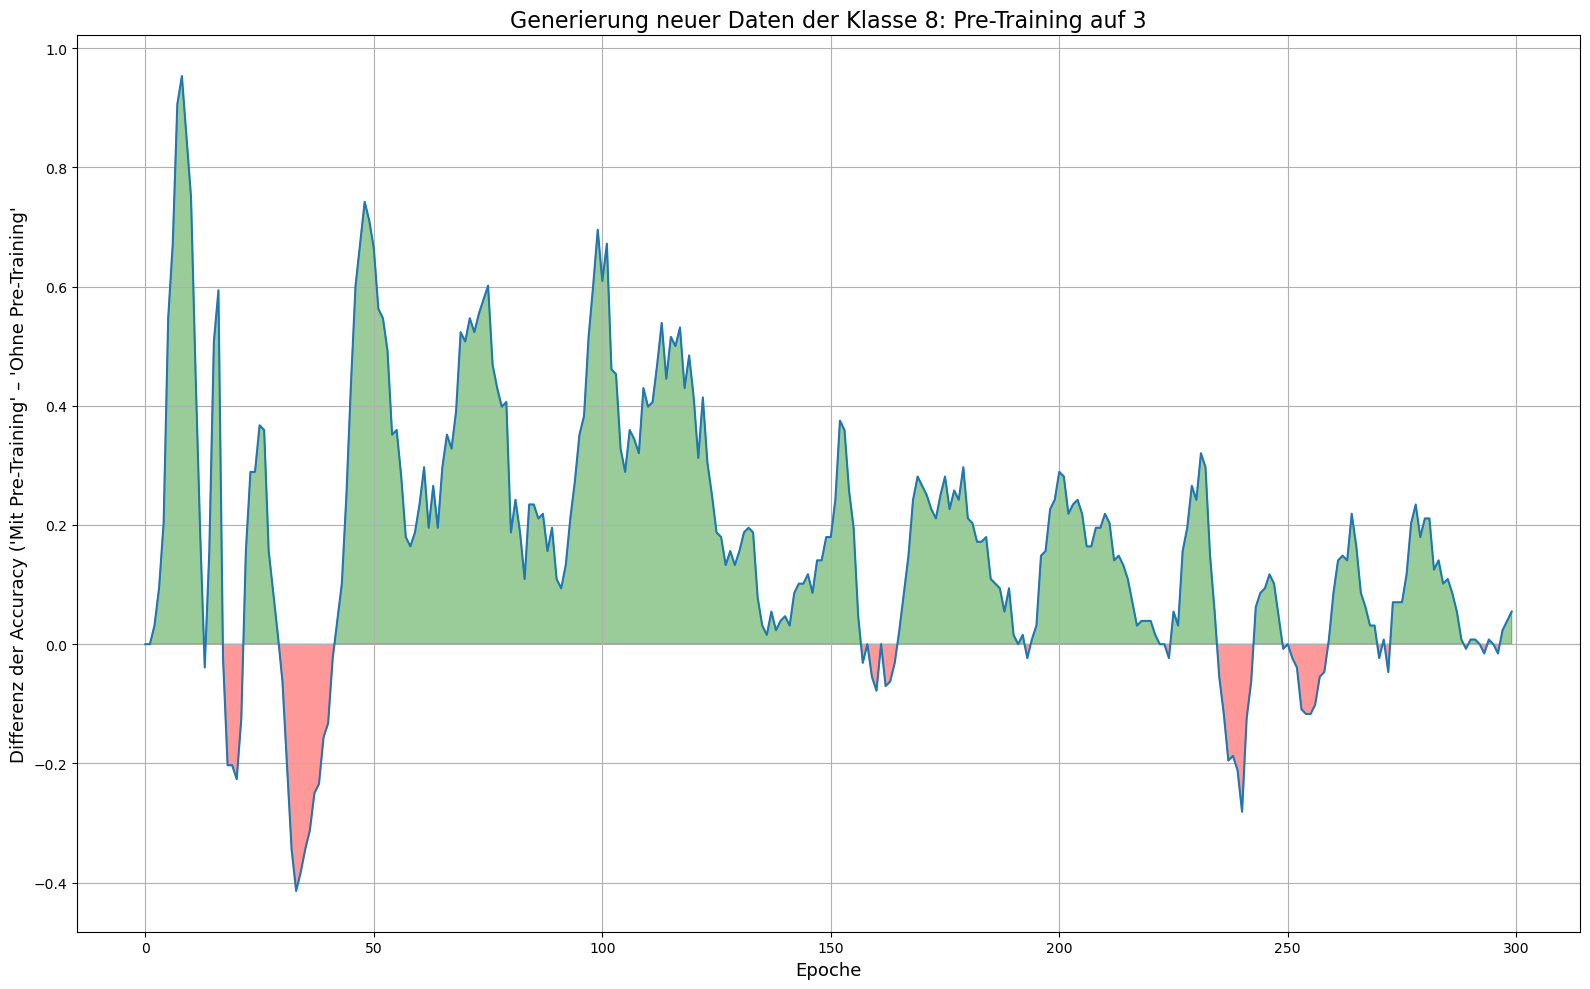

In [53]:
#x = np.arange(50)
x = np.arange(300)
y = (pre_trained_0_to_9_complete["8"]["3"] - pre_trained_0_to_9_complete["8"]["8"])#[:50]

plt.figure(figsize=(16,10))
plt.plot(x, y)
plt.fill_between(x, 0, y, where=y>0, interpolate=True, color="green", alpha=0.4)
plt.fill_between(x, 0, y, where=y<0, interpolate=True, color="red", alpha=0.4)
plt.grid()
plt.xlabel("Epoche", fontsize=13)
plt.ylabel("Differenz der Accuracy ('Mit Pre-Training' – 'Ohne Pre-Training'", fontsize=13)
plt.title("Generierung neuer Daten der Klasse 8: Pre-Training auf 3", fontsize=16)
plt.tight_layout()
#plt.savefig("generated/plots/AUC_38_300.svg")
plt.show()

### Store differences of accuracies in dictionary

In [54]:
# AUC: Pre-Training on 'j', Training on 'i'  vs.  Training on 'i'
acc_residuals_dict = {}

for i in range(10):
  for j in range(10):
    if i != j:
      acc_residuals_dict[f"{j}{i}"] = pre_trained_0_to_9_complete[f"{i}"][f"{j}"] - pre_trained_0_to_9_complete[f"{i}"][f"{i}"]

## Calculate positive and negative area under the curve 

In [55]:
from scipy.integrate import simps, trapezoid

### Store area under curve in dictionary

auc_trapez_residuals_accuracy_dict_50 = {}
auc_trapez_residuals_accuracy_dict_100 = {}
auc_trapez_residuals_accuracy_dict_200 = {}
auc_trapez_residuals_accuracy_dict_300 = {}


for i in range(10):
  for j in range(10):
    if i != j:
      auc_trapez_residuals_accuracy_dict_50[f"{i}{j}"] = trapezoid(acc_residuals_dict[f"{i}{j}"][:50])
      auc_trapez_residuals_accuracy_dict_100[f"{i}{j}"] = trapezoid(acc_residuals_dict[f"{i}{j}"][:100])
      auc_trapez_residuals_accuracy_dict_200[f"{i}{j}"] = trapezoid(acc_residuals_dict[f"{i}{j}"][:200])
      auc_trapez_residuals_accuracy_dict_300[f"{i}{j}"] = trapezoid(acc_residuals_dict[f"{i}{j}"])

auc_trapez_dict_sorted_50 = {k: v for k, v in sorted(auc_trapez_residuals_accuracy_dict_100.items(), key=lambda item: item[1], reverse=True)}
auc_trapez_dict_sorted_100 = {k: v for k, v in sorted(auc_trapez_residuals_accuracy_dict_100.items(), key=lambda item: item[1], reverse=True)}
auc_trapez_dict_sorted_200 = {k: v for k, v in sorted(auc_trapez_residuals_accuracy_dict_200.items(), key=lambda item: item[1], reverse=True)}
auc_trapez_dict_sorted_300 = {k: v for k, v in sorted(auc_trapez_residuals_accuracy_dict_300.items(), key=lambda item: item[1], reverse=True)}

In [56]:
auc_residuals_accuracy_dict_50 = {}
auc_residuals_accuracy_dict_100 = {}
auc_residuals_accuracy_dict_200 = {}
auc_residuals_accuracy_dict_300 = {}


for i in range(10):
  for j in range(10):
    if i != j:
      auc_residuals_accuracy_dict_50[f"{i}{j}"] = simps(acc_residuals_dict[f"{i}{j}"][:50])
      auc_residuals_accuracy_dict_100[f"{i}{j}"] = simps(acc_residuals_dict[f"{i}{j}"][:100])
      auc_residuals_accuracy_dict_200[f"{i}{j}"] = simps(acc_residuals_dict[f"{i}{j}"][:200])
      auc_residuals_accuracy_dict_300[f"{i}{j}"] = simps(acc_residuals_dict[f"{i}{j}"])

In [57]:
auc_dict_sorted_50 = {k: v for k, v in sorted(auc_residuals_accuracy_dict_50.items(), key=lambda item: item[1], reverse=True)}
auc_dict_sorted_100 = {k: v for k, v in sorted(auc_residuals_accuracy_dict_100.items(), key=lambda item: item[1], reverse=True)}
auc_dict_sorted_200 = {k: v for k, v in sorted(auc_residuals_accuracy_dict_200.items(), key=lambda item: item[1], reverse=True)}
auc_dict_sorted_300 = {k: v for k, v in sorted(auc_residuals_accuracy_dict_300.items(), key=lambda item: item[1], reverse=True)}

In [58]:
auc_dict_sorted_300

{'38': 52.932291666666664,
 '49': 51.716796875,
 '79': 48.09114583333333,
 '58': 45.77473958333333,
 '28': 45.0625,
 '08': 44.91341145833333,
 '68': 42.777994791666664,
 '89': 41.23958333333333,
 '39': 40.64778645833333,
 '98': 40.16341145833333,
 '48': 39.25716145833333,
 '59': 38.19075520833333,
 '29': 35.16145833333333,
 '09': 34.113932291666664,
 '78': 33.20052083333333,
 '75': 32.609375,
 '69': 32.5703125,
 '35': 31.645182291666664,
 '95': 31.473958333333332,
 '05': 29.465494791666664,
 '85': 29.3828125,
 '18': 28.161458333333332,
 '25': 27.839192708333332,
 '45': 26.432942708333332,
 '15': 26.28125,
 '19': 23.619791666666664,
 '06': 20.725260416666664,
 '94': 20.529947916666664,
 '86': 20.36328125,
 '65': 20.243489583333332,
 '96': 19.452473958333332,
 '46': 19.376953125,
 '26': 18.124348958333332,
 '03': 17.361328125,
 '63': 16.793619791666664,
 '53': 16.496744791666664,
 '36': 16.055989583333332,
 '54': 15.582682291666666,
 '56': 15.313802083333332,
 '50': 15.00390625,
 '20': 1

In [59]:
for i in range(10):
  for key, value in auc_dict_sorted_50.items():
    if int(key[1]) == i:
      print(key, value.round(2))
      break

50 12.24
51 2.94
82 2.23
63 8.7
94 9.31
95 14.23
46 13.52
97 10.43
68 8.27
49 13.83


In [60]:
auc_dict_sorted_300

{'38': 52.932291666666664,
 '49': 51.716796875,
 '79': 48.09114583333333,
 '58': 45.77473958333333,
 '28': 45.0625,
 '08': 44.91341145833333,
 '68': 42.777994791666664,
 '89': 41.23958333333333,
 '39': 40.64778645833333,
 '98': 40.16341145833333,
 '48': 39.25716145833333,
 '59': 38.19075520833333,
 '29': 35.16145833333333,
 '09': 34.113932291666664,
 '78': 33.20052083333333,
 '75': 32.609375,
 '69': 32.5703125,
 '35': 31.645182291666664,
 '95': 31.473958333333332,
 '05': 29.465494791666664,
 '85': 29.3828125,
 '18': 28.161458333333332,
 '25': 27.839192708333332,
 '45': 26.432942708333332,
 '15': 26.28125,
 '19': 23.619791666666664,
 '06': 20.725260416666664,
 '94': 20.529947916666664,
 '86': 20.36328125,
 '65': 20.243489583333332,
 '96': 19.452473958333332,
 '46': 19.376953125,
 '26': 18.124348958333332,
 '03': 17.361328125,
 '63': 16.793619791666664,
 '53': 16.496744791666664,
 '36': 16.055989583333332,
 '54': 15.582682291666666,
 '56': 15.313802083333332,
 '50': 15.00390625,
 '20': 1

In [61]:
for i in range(10):
  for key, value in auc_dict_sorted_300.items():
    if int(key[1]) == i:
      print(key, value.round(2))
      break

50 15.0
91 5.59
92 12.86
03 17.36
94 20.53
75 32.61
06 20.73
87 11.58
38 52.93
49 51.72


In [62]:
AUC_matrix_300 = np.zeros((10,10))
AUC_matrix_200 = np.zeros((10,10))
AUC_matrix_100 = np.zeros((10,10))
AUC_matrix_50 = np.zeros((10,10))

for i in range(10):
  for j in range(10):
    if i != j:
      AUC_matrix_300[i][j] = auc_dict_sorted_300[f"{i}{j}"]
      AUC_matrix_200[i][j] = auc_dict_sorted_200[f"{i}{j}"]
      AUC_matrix_100[i][j] = auc_dict_sorted_100[f"{i}{j}"]
      AUC_matrix_50[i][j] = auc_dict_sorted_50[f"{i}{j}"]

# Normalize AUC
min_total = 9999999
max_total = -9999999


for i in range(10):
  for j in range(10):
    min_temp = AUC_matrix_300[i].min()
    max_temp = AUC_matrix_300[i].max()
    if min_temp < min_total:
      min_total = min_temp
    if max_temp > max_total:
      max_total = max_temp

AUC_matrix_300_norm = np.zeros((10,10))  
for i in range(10):
  for j in range(10):
    if i != j:
      AUC_matrix_300_norm[i][j] = (AUC_matrix_300[i][j] - min_total)/(max_total-min_total)



min_total = 9999999
max_total = -9999999


for i in range(10):
  for j in range(10):
    min_temp = AUC_matrix_50[i].min()
    max_temp = AUC_matrix_50[i].max()
    if min_temp < min_total:
      min_total = min_temp
    if max_temp > max_total:
      max_total = max_temp

AUC_matrix_50_norm = np.zeros((10,10))  
for i in range(10):
  for j in range(10):
    if i != j:
      AUC_matrix_50_norm[i][j] = (AUC_matrix_50[i][j] - min_total)/(max_total-min_total)



# Sort 
AUC_matrix_300_norm_dict_sorted = {}
AUC_matrix_50_norm_dict_sorted = {}

for i in range(10):
  for j in range(10):
    if i != j:
      AUC_matrix_300_norm_dict_sorted[f"{i}{j}"] = AUC_matrix_300_norm_dict[i][j]
      AUC_matrix_50_norm_dict_sorted[f"{i}{j}"] = AUC_matrix_50_norm[i][j]

AUC_matrix_50_norm_dict_sorted = {k: v for k, v in sorted(AUC_matrix_50_norm_dict_sorted.items(), key=lambda item: item[1], reverse=True)}
AUC_matrix_300_norm_dict_sorted = {k: v for k, v in sorted(AUC_matrix_300_norm_dict_sorted.items(), key=lambda item: item[1], reverse=True)}



print("50 Epochs")
for i in range(10):
  for key, value in AUC_matrix_50_norm_dict_sorted.items():
    if key[1] == str(i):
      print(key, value)
      break

print("\n300 Epochs")
for i in range(10):
  for key, value in AUC_matrix_300_norm_dict_sorted.items():
    if key[1] == str(i):
      print(key, value)
      break


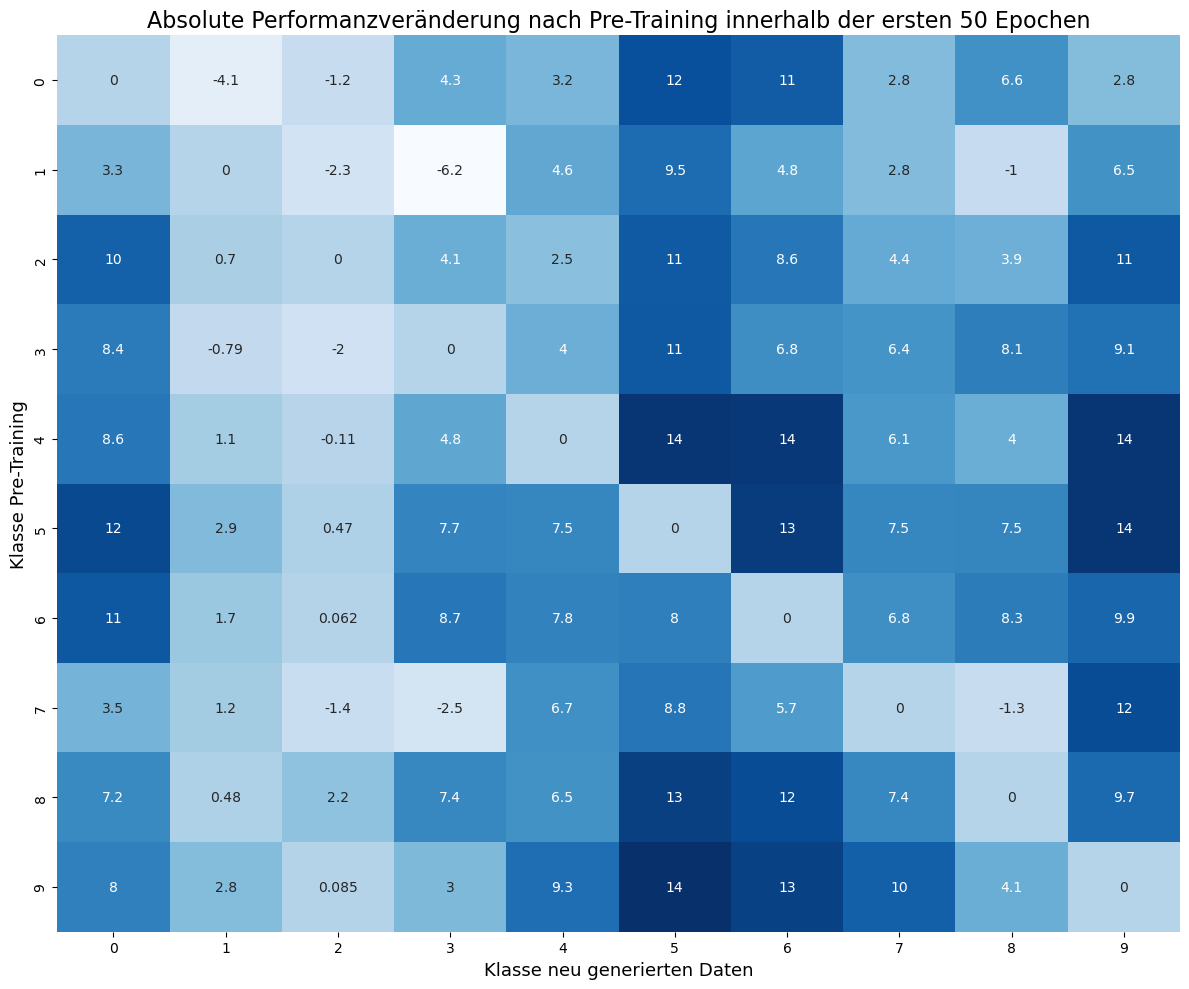

In [63]:
# Heatmap AUC
plt.figure(figsize=(12,10))
sns.heatmap(AUC_matrix_50, cmap="Blues", annot=True, cbar=False) #YlGnBu
plt.title("Absolute Performanzveränderung nach Pre-Training innerhalb der ersten 50 Epochen", fontsize=16)
plt.xlabel("Klasse neu generierten Daten", fontsize=13)
plt.ylabel("Klasse Pre-Training", fontsize=13)
plt.tight_layout()
#plt.savefig("generated/plots/heatmap_auc_50.svg")
plt.show()


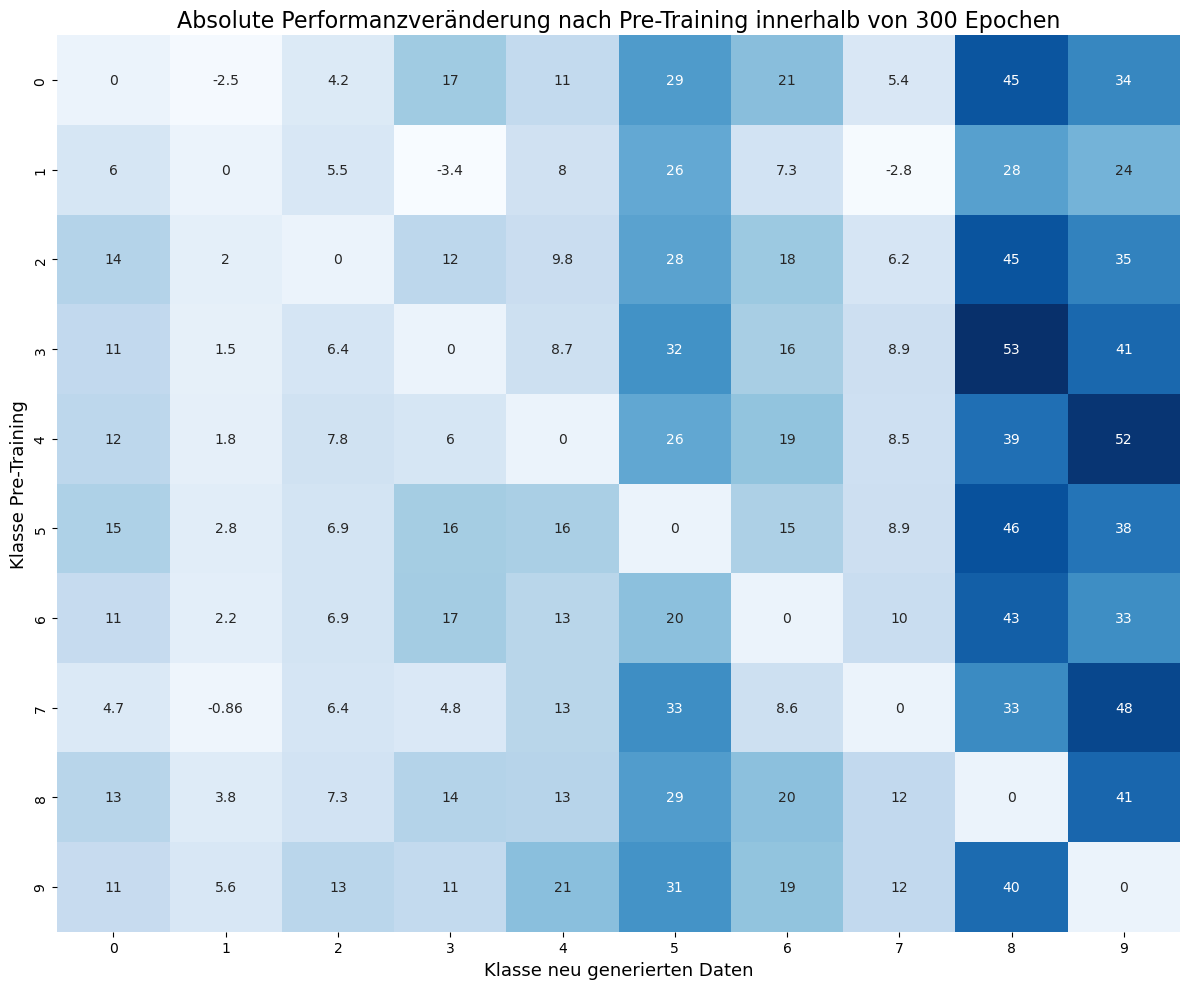

In [64]:
# Heatmap AUC
plt.figure(figsize=(12,10))
sns.heatmap(AUC_matrix_300, cmap="Blues", annot=True, cbar=False) #YlGnBu
plt.title("Absolute Performanzveränderung nach Pre-Training innerhalb von 300 Epochen", fontsize=16)
plt.xlabel("Klasse neu generierten Daten", fontsize=13)
plt.ylabel("Klasse Pre-Training", fontsize=13)
plt.tight_layout()
#plt.savefig("generated/plots/heatmap_auc_300.svg")
plt.show()


In [65]:
auc_dict_sorted_300

{'38': 52.932291666666664,
 '49': 51.716796875,
 '79': 48.09114583333333,
 '58': 45.77473958333333,
 '28': 45.0625,
 '08': 44.91341145833333,
 '68': 42.777994791666664,
 '89': 41.23958333333333,
 '39': 40.64778645833333,
 '98': 40.16341145833333,
 '48': 39.25716145833333,
 '59': 38.19075520833333,
 '29': 35.16145833333333,
 '09': 34.113932291666664,
 '78': 33.20052083333333,
 '75': 32.609375,
 '69': 32.5703125,
 '35': 31.645182291666664,
 '95': 31.473958333333332,
 '05': 29.465494791666664,
 '85': 29.3828125,
 '18': 28.161458333333332,
 '25': 27.839192708333332,
 '45': 26.432942708333332,
 '15': 26.28125,
 '19': 23.619791666666664,
 '06': 20.725260416666664,
 '94': 20.529947916666664,
 '86': 20.36328125,
 '65': 20.243489583333332,
 '96': 19.452473958333332,
 '46': 19.376953125,
 '26': 18.124348958333332,
 '03': 17.361328125,
 '63': 16.793619791666664,
 '53': 16.496744791666664,
 '36': 16.055989583333332,
 '54': 15.582682291666666,
 '56': 15.313802083333332,
 '50': 15.00390625,
 '20': 1

plt.figure(figsize=(20,10))
for i in range(10):
  plt.subplot(2,5,i+1)
  for j in range(10):
    if i != j:
      """
      max = euclidean_distances[i].max()
      min = euclidean_distances[i][euclidean_distances[i] > 0].min()
      barlist = plt.bar(np.arange(0,10,1), euclidean_distances[i])
      barlist[np.where(euclidean_distances[i] == max)[0][0]].set_color("red")
      barlist[np.where(euclidean_distances[i] == max)[0][0]].set_label("Größter Abstand")
      barlist[np.where(euclidean_distances[i] == min)[0][0]].set_color("mediumseagreen")
      barlist[np.where(euclidean_distances[i] == min)[0][0]].set_label("Kleinster Abstand")
      """
      #maxi = 5 * (AUC_matrix_300.max() / 5).round() +5
      #mini = 5 * (AUC_matrix_300.min() / 5).round() -5
      plt.bar(j, AUC_matrix_50_norm_dict_sorted[f"{j}{i}"], color="tab:blue")#, label=f"{j}")
  #plt.legend()
  plt.xticks(np.arange(10))
  plt.title(f"Generierung von Daten der Klasse {i}")#, fontsize=16)
  plt.xlabel("Verwendete Klasse beim Pre-Training")#, fontsize=13)
  plt.ylabel("Absolute Änderung der Performanz")#, fontsize=13)
  plt.yticks(np.arange(0,1.05, 0.05))
  plt.tight_layout()
plt.tight_layout()
#plt.savefig(f"generated/plots/AUC/auc_overview_50_norm.svg")
plt.show()

# Correlation: Euclidean, AUC

In [66]:
# Normalize Euclidean
min_total = 9999999
max_total = -9999999


for i in range(10):
  for j in range(10):
    min_temp = euclidean_distances[i].min()
    max_temp = euclidean_distances[i].max()
    if min_temp < min_total:
      min_total = min_temp
    if max_temp > max_total:
      max_total = max_temp

euclidean_distances_norm = np.zeros((10,10))  
for i in range(10):
  for j in range(10):
    if i != j:
      euclidean_distances_norm[i][j] = (euclidean_distances[i][j] - min_total)/(max_total-min_total)


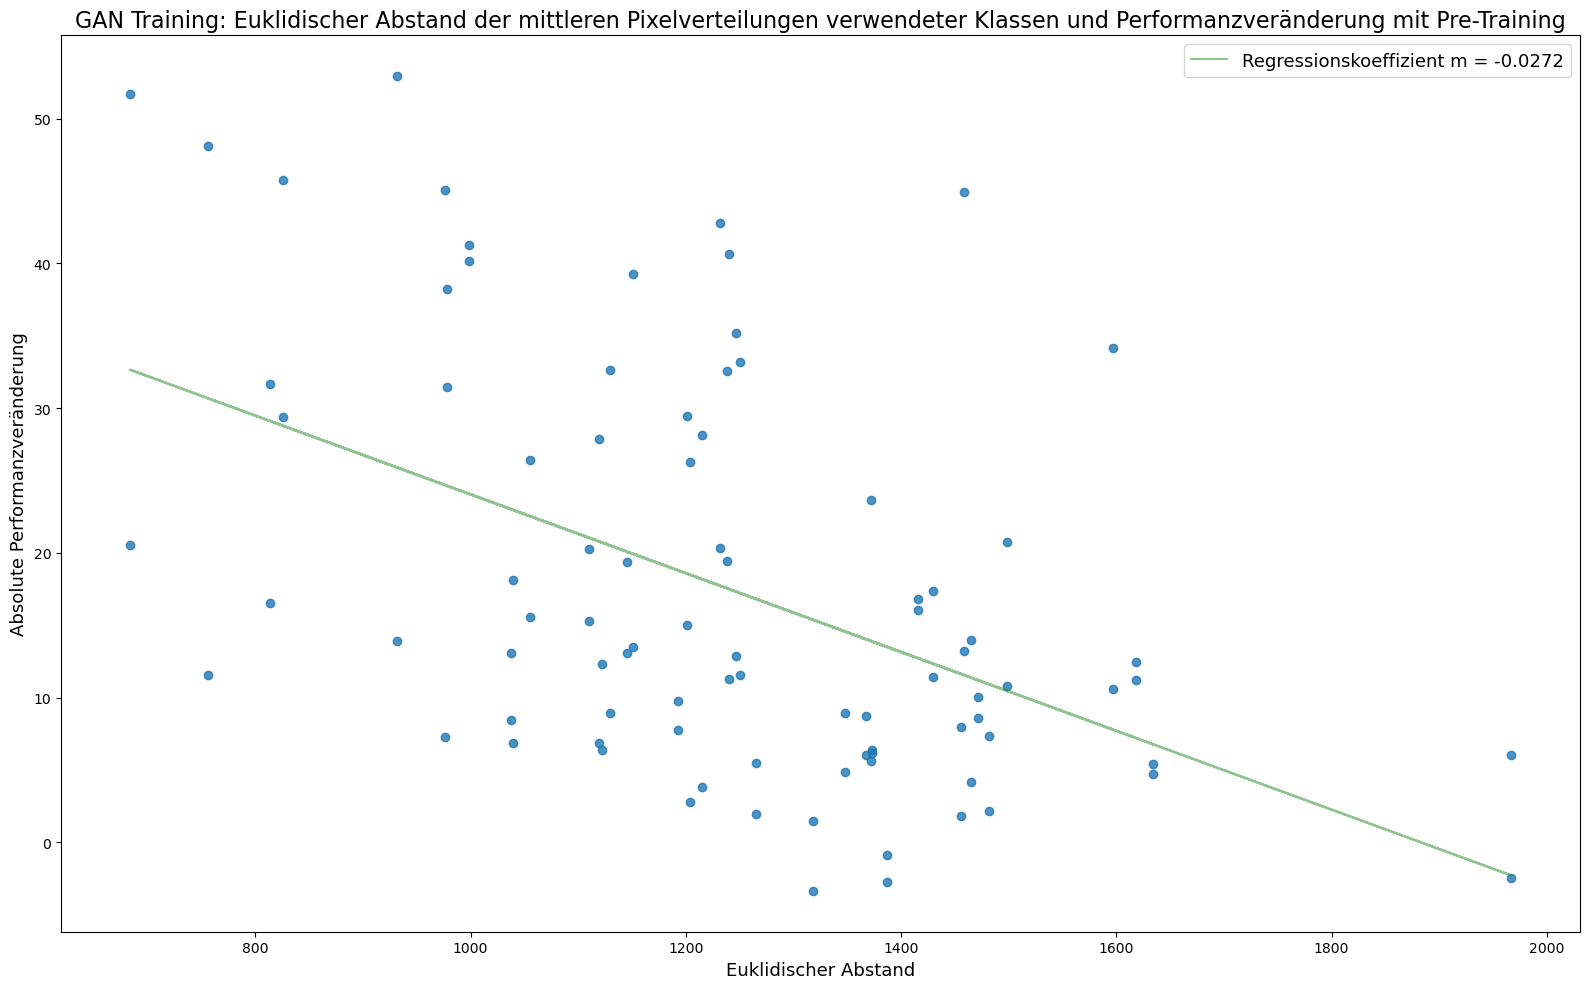

In [67]:
x = []
y = []

plt.figure(figsize=(16,10))
"""
for i in range(10):
  x.append(euclidean_distances[i][:])
  y.append(AUC_matrix_300[i][:])
"""
for i in range(10):
  for j in range(10):
    if i != j:
      x.append(euclidean_distances[i][j])
      y.append(AUC_matrix_300[i][j])
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.array(x) + b, label=f"Regressionskoeffizient m = {m.round(4)}", color="forestgreen", alpha=0.5)

plt.scatter(x, y, alpha=0.8)
plt.title("GAN Training: Euklidischer Abstand der mittleren Pixelverteilungen verwendeter Klassen und Performanzveränderung mit Pre-Training", fontsize=16)
plt.xlabel("Euklidischer Abstand", fontsize=13)
plt.ylabel("Absolute Performanzveränderung", fontsize=13)
plt.legend(fontsize=13)
plt.tight_layout()
#plt.savefig(f"generated/plots/euclidean_auc_regression.svg")
plt.show()

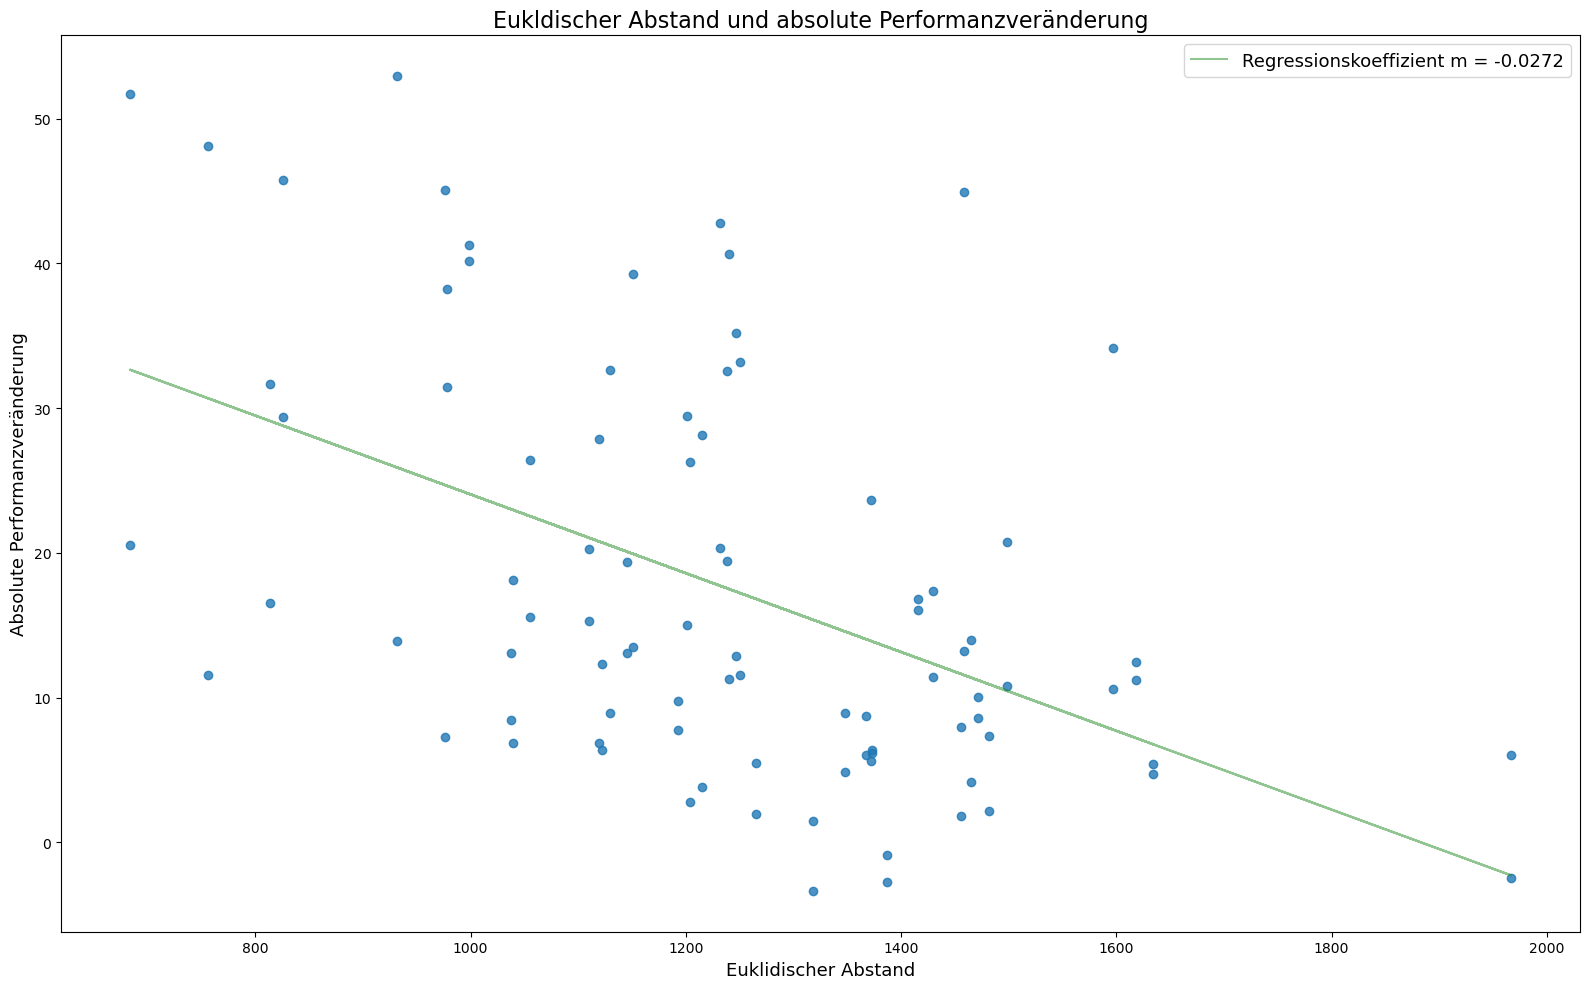

In [68]:
x = []
y = []

plt.figure(figsize=(16,10))
"""
for i in range(10):
  x.append(euclidean_distances[i][:])
  y.append(AUC_matrix_300[i][:])
"""
for i in range(10):
  for j in range(10):
    if i != j:
      x.append(euclidean_distances[i][j])
      y.append(AUC_matrix_300[i][j])
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.array(x) + b, label=f"Regressionskoeffizient m = {m.round(4)}", color="forestgreen", alpha=0.5)

plt.scatter(x, y, alpha=0.8)
plt.title("Eukldischer Abstand und absolute Performanzveränderung", fontsize=16)
plt.xlabel("Euklidischer Abstand", fontsize=13)
plt.ylabel("Absolute Performanzveränderung", fontsize=13)
plt.legend(fontsize=13)
plt.tight_layout()
#plt.savefig(f"generated/plots/AUC/euclidean_auc_regression.svg")
plt.show()

# Regression: First >95% vs. "absolute Performanzveränderung"

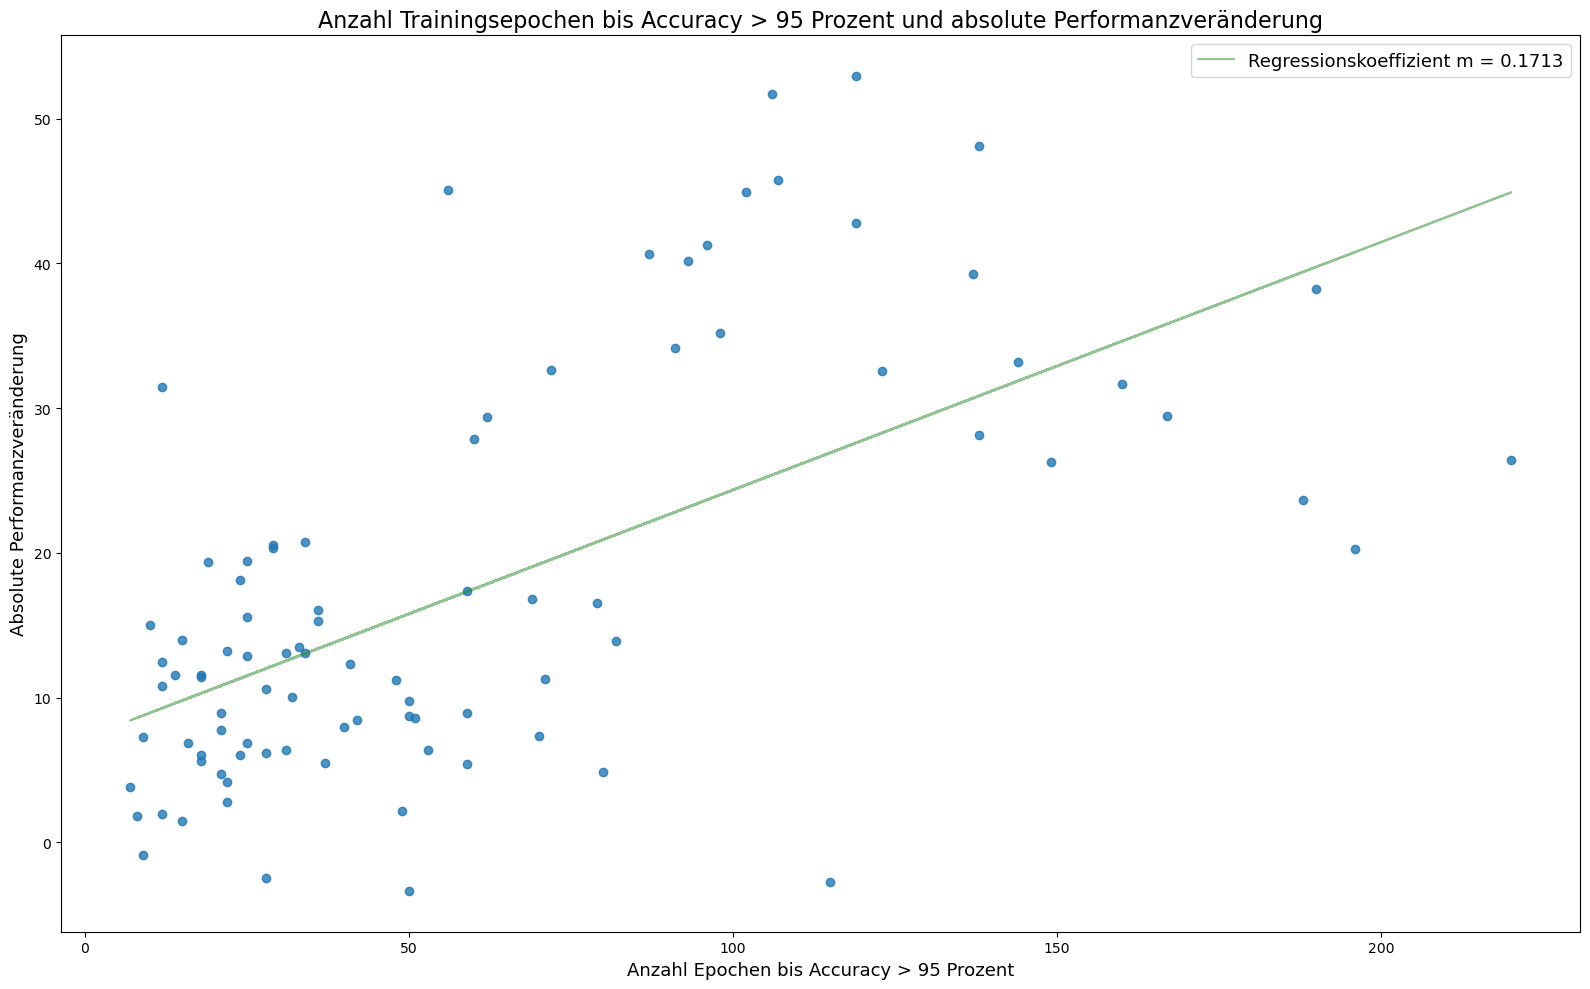

In [69]:
x = []
y = []

plt.figure(figsize=(16,10))
"""
for i in range(10):
  x.append(euclidean_distances[i][:])
  y.append(AUC_matrix_300[i][:])
"""
for i in range(10):
  for j in range(10):
    if i != j:
      x.append(pre_trained_0_to_9_complete_rolling_90_epoch[f"{i}{j}"][0])
      y.append(AUC_matrix_300[i][j])
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*np.array(x) + b, label=f"Regressionskoeffizient m = {m.round(4)}", color="forestgreen", alpha=0.5)

plt.scatter(x, y, alpha=0.8)
plt.title("Anzahl Trainingsepochen bis Accuracy > 95 Prozent und absolute Performanzveränderung", fontsize=16)
plt.xlabel("Anzahl Epochen bis Accuracy > 95 Prozent", fontsize=13)
plt.ylabel("Absolute Performanzveränderung", fontsize=13)
plt.legend(fontsize=13)
plt.tight_layout()
#plt.savefig(f"generated/plots/AUC/epoch95acc_auc_regression.svg")
plt.show()

In [70]:
pre_trained_0_to_9_complete_rolling_90_epoch["83"]

(82, 0.95078125)

# Analyse repetitive GAN Performances

In [71]:
final_dict_rep = {}

path_1 = "/Users/fredo/Dev/gans_mnist/generated/is_stable/images_300pre_300post_test/"
path_2 = "/Users/fredo/Dev/gans_mnist/generated/is_stable_2/images_300pre_300post_test/"
path_3 = "/Users/fredo/Dev/gans_mnist/generated/is_stable_3/images_300pre_300post_test/"
path_4 = "/Users/fredo/Dev/gans_mnist/generated/is_stable_4/images_300pre_300post_test/"
path_5 = "/Users/fredo/Dev/gans_mnist/generated/is_stable_5/images_300pre_300post_test/"
#path = "/Volumes/GoogleDrive-117672631860430354525/Meine Ablage/"


auc_residuals_accuracy_dict_300_rep = {}
for i in ['38','49','79','58','28','13', '17','01', '71', '31']:
  auc_residuals_accuracy_dict_300_rep[i] = []


for num, path in enumerate([path_1, path_2, path_3, path_4, path_5]):
  iteration = num
  for key in ['8', '3', '38', '9', '4', '49', '7', '79', '5', '58', '2', '28', '1', '13', '17', '0', '01', '71', '31']:
    final_dict_rep[key + f"_{iteration}"] = pd.read_csv(path + f"/{key}/accuracy_{key}.csv", names=["epoch","accuracy"], header=0)


  # AUC: Pre-Training - No Pre-Training
  acc_residuals_dict_rep = {}

  for i in [(8,(3,8)),(9,(4,9)),(9,(7,9)), (8,(5,8)), (8,(2,8)),
            (3,(1,3)), (7,(1,7)), (1,(0,1)), (1,(7,1)), (1,(3,1))]:
    acc_residuals_dict_rep[f"{i[1][0]}{i[1][1]}" + f"_{iteration}"] = final_dict_rep[f"{i[1][0]}{i[1][1]}" + f"_{iteration}"].accuracy - final_dict_rep[f"{i[0]}" + f"_{iteration}"].accuracy


  for i in ['38','49','79','58','28','13', '17','01', '71', '31']:
    total_change = simps(acc_residuals_dict_rep[i + f"_{iteration}"])
    auc_residuals_accuracy_dict_300_rep[i].append(total_change)

# Create single DataFrame containing total absolute performance changes
df_rep_performance = pd.DataFrame({'38': auc_residuals_accuracy_dict_300_rep['38'],
                                    '49': auc_residuals_accuracy_dict_300_rep['49'],
                                    '79': auc_residuals_accuracy_dict_300_rep['79'],
                                    '58': auc_residuals_accuracy_dict_300_rep['58'],
                                    '28': auc_residuals_accuracy_dict_300_rep['28'],
                                    '13': auc_residuals_accuracy_dict_300_rep['13'],
                                    '17': auc_residuals_accuracy_dict_300_rep['17'],
                                    '01': auc_residuals_accuracy_dict_300_rep['01'],
                                    '71': auc_residuals_accuracy_dict_300_rep['71'], 
                                    '31': auc_residuals_accuracy_dict_300_rep['31']})
# Add data previous of previous experiment
df_rep_performance = df_rep_performance.append({'38': AUC_matrix_300[3][8],
                            '49': AUC_matrix_300[4][9],
                            '79': AUC_matrix_300[7][9],
                            '58': AUC_matrix_300[5][8],
                            '28': AUC_matrix_300[2][8],
                            '13': AUC_matrix_300[1][3],
                            '17': AUC_matrix_300[1][7],
                            '01': AUC_matrix_300[0][1],
                            '71': AUC_matrix_300[7][1],
                            '31': AUC_matrix_300[3][1],
                            }, ignore_index=True)



In [72]:
for col in df_rep_performance.columns:
  print(df_rep_performance[col].values.round(2))

[43.67 37.59 46.06 33.09 36.07 52.93]
[35.92 23.95 36.4  41.74 34.84 51.72]
[24.48 15.55 22.91 23.24 24.71 48.09]
[39.71 34.58 34.51 37.73 24.48 45.77]
[50.74 39.22 47.77 38.84 41.23 45.06]
[ 6.57  6.33  8.82  4.48 23.14 -3.36]
[ 7.47  5.06  4.87 -0.6  -1.3  -2.77]
[-1.34  4.14  3.77 -4.8  -3.39 -2.48]
[ 3.42  9.62  2.03  2.56  0.56 -0.86]
[8.15 7.7  4.92 0.07 0.24 1.5 ]


### Standard Deviation per Pre-Training-Training Combination

In [73]:
from statistics import pstdev, variance

for i in ['38','49','79','58','28','13', '17','01', '71', '31']:
  print(i, "&" ,np.round(pstdev(df_rep_performance[i]), 2), "&", np.mean(df_rep_performance[i]).round(2))

38 & 6.73 & 41.57
49 & 8.31 & 37.43
79 & 10.14 & 26.5
58 & 6.45 & 36.13
28 & 4.43 & 43.81
13 & 7.91 & 7.66
17 & 3.83 & 2.12
01 & 3.44 & -0.68
71 & 3.31 & 2.89
31 & 3.35 & 3.76


# Sigmoid Function

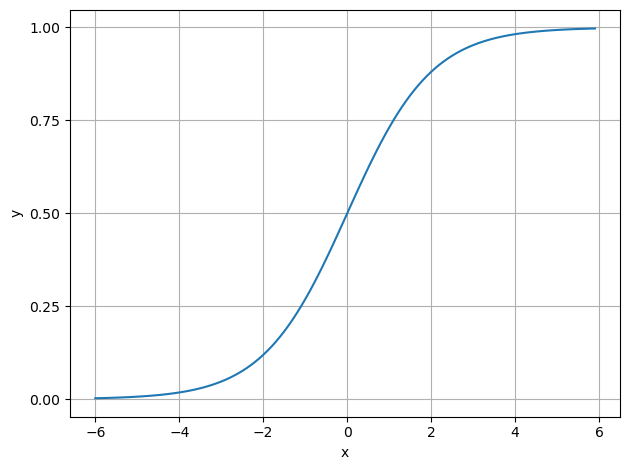

In [74]:
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

x = np.arange(-6., 6., 0.1)
sig = sigmoid(x)
plt.plot(x,sig)
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.tight_layout()
# plt.savefig("/Volumes/GoogleDrive-117672631860430354525/Meine Ablage/Studium/Informatik B.Sc. Bonn/5. Semester/Bachelorarbeit/thesis-template-master/gfx/grafiken/sigmoid_function.svg")
plt.show()